In [ ]:
!pip install opencv-python-headless
!pip install ultralytics  # For YOLOv8
!pip install numpy
!pip install roboflow
!pip install tqdm  # For progress bars


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8l')

results = model.predict('/content/drive/MyDrive/FYP Atomcamp/08fd33_4.mp4', save=True)
print(results[0])
print('======================================================')
for box in results[0].boxes:
    print(box)

100%|██████████| 83.7M/83.7M [00:00<00:00, 204MB/s]




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/750) /content/drive/MyDrive/FYP Atomcamp/08fd33_4.mp4: 384x640 25 persons, 1 sports ball, 1 tv, 1778.3ms
video 1/1 (frame 2/750) /content/drive/MyDrive/FYP Atomcamp/08fd33_4.mp4: 384x640 24 persons, 1 sports ball, 1 tv, 1582.8ms
video 1/1 (frame 3/750) /content/drive/MyDrive/FYP Atomcamp/08fd33_4.mp4: 384x640 24 persons, 1 tv, 2490.7ms
video 1/1 (frame 4/750) /content/drive/MyDrive/FYP Atomcamp/08fd33_4.mp4: 384x640 23 persons, 1 spo

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/FYP Atomcamp/best.pt')

results = model.predict('/content/drive/MyDrive/FYP Atomcamp/08fd33_4.mp4', save=True)
print(results[0])
print('======================================================')
for box in results[0].boxes:
    print(box)

WARNING ⚠️ /content/drive/MyDrive/FYP Atomcamp/best.pt appears to require 'dill', which is not in Ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official Ultralytics model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.0s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator o

#Football player detection and speed and distance calculator


In [ ]:
!pip install opencv-python-headless
!pip install ultralytics  # For YOLOv8
!pip install numpy
!pip install roboflow
!pip install tqdm  # For progress bars

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 645.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.7/871.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8


#video capture

In [ ]:
import cv2

def read_video(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    return frames

def save_video(ouput_video_frames,output_video_path):
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_video_path, fourcc, 24, (ouput_video_frames[0].shape[1], ouput_video_frames[0].shape[0]))
    for frame in ouput_video_frames:
        out.write(frame)
    out.release()

In [ ]:
def get_center_of_bbox(bbox):
    x1,y1,x2,y2 = bbox
    return int((x1+x2)/2),int((y1+y2)/2)

def get_bbox_width(bbox):
    return bbox[2]-bbox[0]

def measure_distance(p1,p2):
    return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5

def measure_xy_distance(p1,p2):
    return p1[0]-p2[0],p1[1]-p2[1]

def get_foot_position(bbox):
    x1,y1,x2,y2 = bbox
    return int((x1+x2)/2),int(y2)

In [ ]:
!pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 1.6 MB/s eta 0:00:00


#Tracker

In [ ]:
from ultralytics import YOLO
import supervision as sv
import pickle
import os
import numpy as np
import pandas as pd
import cv2
import sys
sys.path.append('../')
#from utils import get_center_of_bbox, get_bbox_width, get_foot_position

def get_center_of_bbox(bbox):
    x1,y1,x2,y2 = bbox
    return int((x1+x2)/2),int((y1+y2)/2)

def get_bbox_width(bbox):
    return bbox[2]-bbox[0]

def measure_distance(p1,p2):
    return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5

def measure_xy_distance(p1,p2):
    return p1[0]-p2[0],p1[1]-p2[1]

def get_foot_position(bbox):
    x1,y1,x2,y2 = bbox
    return int((x1+x2)/2),int(y2)

class Tracker:
    def __init__(self, model_path):
        self.model = YOLO(model_path)
        self.tracker = sv.ByteTrack()

    def add_position_to_tracks(sekf,tracks):
        for object, object_tracks in tracks.items():
            for frame_num, track in enumerate(object_tracks):
                for track_id, track_info in track.items():
                    bbox = track_info['bbox']
                    if object == 'ball':
                        position= get_center_of_bbox(bbox)
                    else:
                        position = get_foot_position(bbox)
                    tracks[object][frame_num][track_id]['position'] = position

    def interpolate_ball_positions(self,ball_positions):
        ball_positions = [x.get(1,{}).get('bbox',[]) for x in ball_positions]
        df_ball_positions = pd.DataFrame(ball_positions,columns=['x1','y1','x2','y2'])

        # Interpolate missing values
        df_ball_positions = df_ball_positions.interpolate()
        df_ball_positions = df_ball_positions.bfill()

        ball_positions = [{1: {"bbox":x}} for x in df_ball_positions.to_numpy().tolist()]

        return ball_positions

    def detect_frames(self, frames):
        batch_size=20
        detections = []
        for i in range(0,len(frames),batch_size):
            detections_batch = self.model.predict(frames[i:i+batch_size],conf=0.1)
            detections += detections_batch
        return detections

    def get_object_tracks(self, frames, read_from_stub=False, stub_path=None):

        if read_from_stub and stub_path is not None and os.path.exists(stub_path):
            with open(stub_path,'rb') as f:
                tracks = pickle.load(f)
            return tracks

        detections = self.detect_frames(frames)

        tracks={
            "players":[],
            "referees":[],
            "ball":[]
        }

        for frame_num, detection in enumerate(detections):
            cls_names = detection.names
            cls_names_inv = {v:k for k,v in cls_names.items()}

            # Covert to supervision Detection format
            detection_supervision = sv.Detections.from_ultralytics(detection)

            # Convert GoalKeeper to player object
            for object_ind , class_id in enumerate(detection_supervision.class_id):
                if cls_names[class_id] == "goalkeeper":
                    detection_supervision.class_id[object_ind] = cls_names_inv["player"]

            # Track Objects
            detection_with_tracks = self.tracker.update_with_detections(detection_supervision)

            tracks["players"].append({})
            tracks["referees"].append({})
            tracks["ball"].append({})

            for frame_detection in detection_with_tracks:
                bbox = frame_detection[0].tolist()
                cls_id = frame_detection[3]
                track_id = frame_detection[4]

                if cls_id == cls_names_inv['player']:
                    tracks["players"][frame_num][track_id] = {"bbox":bbox}

                if cls_id == cls_names_inv['referee']:
                    tracks["referees"][frame_num][track_id] = {"bbox":bbox}

            for frame_detection in detection_supervision:
                bbox = frame_detection[0].tolist()
                cls_id = frame_detection[3]

                if cls_id == cls_names_inv['ball']:
                    tracks["ball"][frame_num][1] = {"bbox":bbox}

        # Ensure the directory for saving the pickle file exists
                if stub_path is not None:
            # Extract the directory from the stub_path
                  stub_dir = os.path.dirname(stub_path)

            # If the directory doesn't exist, create it
                if not os.path.exists(stub_dir):
                    os.makedirs(stub_dir)

            # Save the tracks to the pickle file
                with open(stub_path, 'wb') as f:
                  pickle.dump(tracks, f)


        return tracks

    def draw_ellipse(self,frame,bbox,color,track_id=None):
        y2 = int(bbox[3])
        x_center, _ = get_center_of_bbox(bbox)
        width = get_bbox_width(bbox)

        cv2.ellipse(
            frame,
            center=(x_center,y2),
            axes=(int(width), int(0.35*width)),
            angle=0.0,
            startAngle=-45,
            endAngle=235,
            color = color,
            thickness=2,
            lineType=cv2.LINE_4
        )

        rectangle_width = 40
        rectangle_height=20
        x1_rect = x_center - rectangle_width//2
        x2_rect = x_center + rectangle_width//2
        y1_rect = (y2- rectangle_height//2) +15
        y2_rect = (y2+ rectangle_height//2) +15

        if track_id is not None:
            cv2.rectangle(frame,
                          (int(x1_rect),int(y1_rect) ),
                          (int(x2_rect),int(y2_rect)),
                          color,
                          cv2.FILLED)

            x1_text = x1_rect+12
            if track_id > 99:
                x1_text -=10

            cv2.putText(
                frame,
                f"{track_id}",
                (int(x1_text),int(y1_rect+15)),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.6,
                (0,0,0),
                2
            )

        return frame

    def draw_traingle(self,frame,bbox,color):
        y= int(bbox[1])
        x,_ = get_center_of_bbox(bbox)

        triangle_points = np.array([
            [x,y],
            [x-10,y-20],
            [x+10,y-20],
        ])
        cv2.drawContours(frame, [triangle_points],0,color, cv2.FILLED)
        cv2.drawContours(frame, [triangle_points],0,(0,0,0), 2)

        return frame

    def draw_team_ball_control(self,frame,frame_num,team_ball_control):
        # Draw a semi-transparent rectaggle
        overlay = frame.copy()
        cv2.rectangle(overlay, (1350, 850), (1900,970), (255,255,255), -1 )
        alpha = 0.4
        cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0, frame)

        team_ball_control_till_frame = team_ball_control[:frame_num+1]
        # Get the number of time each team had ball control
        team_1_num_frames = team_ball_control_till_frame[team_ball_control_till_frame==1].shape[0]
        team_2_num_frames = team_ball_control_till_frame[team_ball_control_till_frame==2].shape[0]
        team_1 = team_1_num_frames/(team_1_num_frames+team_2_num_frames)
        team_2 = team_2_num_frames/(team_1_num_frames+team_2_num_frames)

        cv2.putText(frame, f"Team 1 Ball Control: {team_1*100:.2f}%",(1400,900), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 3)
        cv2.putText(frame, f"Team 2 Ball Control: {team_2*100:.2f}%",(1400,950), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 3)

        return frame

    def draw_annotations(self, video_frames, tracks, team_ball_control):
      output_video_frames = []

      # Ensure track lengths match the video frames
      num_frames = len(video_frames)
      num_track_frames = len(tracks["players"])

      for frame_num in range(num_frames):
          frame = video_frames[frame_num].copy()

          # Only process frames if they exist in the tracks dictionary
          if frame_num < num_track_frames:
              player_dict = tracks["players"][frame_num]
              ball_dict = tracks["ball"][frame_num]
              referee_dict = tracks["referees"][frame_num]

              # Draw Players
              for track_id, player in player_dict.items():
                  color = player.get("team_color", (0, 0, 255))
                  frame = self.draw_ellipse(frame, player["bbox"], color, track_id)

                  if player.get('has_ball', False):
                      frame = self.draw_traingle(frame, player["bbox"], (0, 0, 255))

              # Draw Referee
              for _, referee in referee_dict.items():
                  frame = self.draw_ellipse(frame, referee["bbox"], (0, 255, 255))

              # Draw Ball
              for track_id, ball in ball_dict.items():
                  frame = self.draw_traingle(frame, ball["bbox"], (0, 255, 0))

              # Draw Team Ball Control
              frame = self.draw_team_ball_control(frame, frame_num, team_ball_control)

          output_video_frames.append(frame)

      return output_video_frames

#color assignment

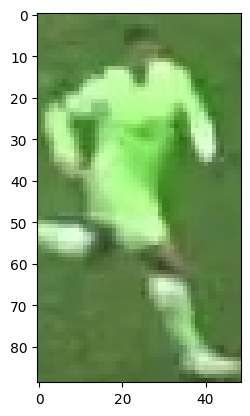

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

image_path = "/content/drive/MyDrive/FYP Atomcamp/player_1.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

#take the top half of the image

take the top half of the image

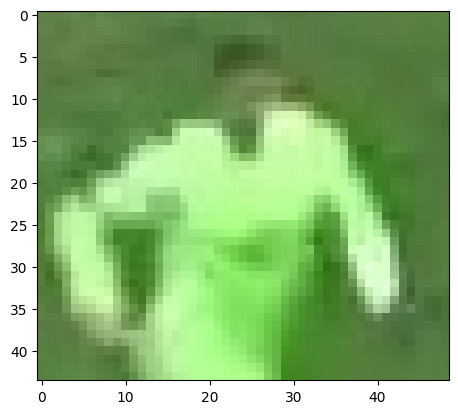

In [ ]:
top_half_image=  image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

Cluster the image into two clusters

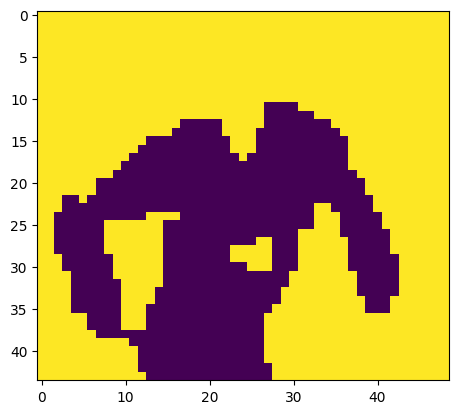

In [ ]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the orginal image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [ ]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [ ]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [ ]:
kmeans.cluster_centers_[player_cluster]

array([     171.38,      235.65,      142.85])

#Team Assigner

In [ ]:
from sklearn.cluster import KMeans

class TeamAssigner:
    def __init__(self):
        self.team_colors = {}
        self.player_team_dict = {}

    def get_clustering_model(self,image):
        # Reshape the image to 2D array
        image_2d = image.reshape(-1,3)

        # Preform K-means with 2 clusters
        kmeans = KMeans(n_clusters=2, init="k-means++",n_init=1)
        kmeans.fit(image_2d)

        return kmeans

    def get_player_color(self,frame,bbox):
        image = frame[int(bbox[1]):int(bbox[3]),int(bbox[0]):int(bbox[2])]

        top_half_image = image[0:int(image.shape[0]/2),:]

        # Get Clustering model
        kmeans = self.get_clustering_model(top_half_image)

        # Get the cluster labels forr each pixel
        labels = kmeans.labels_

        # Reshape the labels to the image shape
        clustered_image = labels.reshape(top_half_image.shape[0],top_half_image.shape[1])

        # Get the player cluster
        corner_clusters = [clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
        non_player_cluster = max(set(corner_clusters),key=corner_clusters.count)
        player_cluster = 1 - non_player_cluster

        player_color = kmeans.cluster_centers_[player_cluster]

        return player_color


    def assign_team_color(self,frame, player_detections):

        player_colors = []
        for _, player_detection in player_detections.items():
            bbox = player_detection["bbox"]
            player_color =  self.get_player_color(frame,bbox)
            player_colors.append(player_color)

        kmeans = KMeans(n_clusters=2, init="k-means++",n_init=10)
        kmeans.fit(player_colors)

        self.kmeans = kmeans

        self.team_colors[1] = kmeans.cluster_centers_[0]
        self.team_colors[2] = kmeans.cluster_centers_[1]


    def get_player_team(self,frame,player_bbox,player_id):
        if player_id in self.player_team_dict:
            return self.player_team_dict[player_id]

        player_color = self.get_player_color(frame,player_bbox)

        team_id = self.kmeans.predict(player_color.reshape(1,-1))[0]
        team_id+=1

        if player_id ==91:  #for the goalkeeper
            team_id=1
        if player_id == 213:
            team_id=2
        self.player_team_dict[player_id] = team_id

        return team_id

#player ball assigner

In [ ]:
import sys
sys.path.append('../')

def get_center_of_bbox(bbox):
    x1,y1,x2,y2 = bbox
    return int((x1+x2)/2),int((y1+y2)/2)


def measure_distance(p1,p2):
    return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5

class PlayerBallAssigner():
    def __init__(self):
        self.max_player_ball_distance = 70

    def assign_ball_to_player(self,players,ball_bbox):
        ball_position = get_center_of_bbox(ball_bbox)

        miniumum_distance = 99999
        assigned_player=-1

        for player_id, player in players.items():
            player_bbox = player['bbox']

            distance_left = measure_distance((player_bbox[0],player_bbox[-1]),ball_position)
            distance_right = measure_distance((player_bbox[2],player_bbox[-1]),ball_position)
            distance = min(distance_left,distance_right)

            if distance < self.max_player_ball_distance:
                if distance < miniumum_distance:
                    miniumum_distance = distance
                    assigned_player = player_id

        return assigned_player

#Camera Movement Estimator

In [ ]:
import pickle
import cv2
import numpy as np
import os
import sys
sys.path.append('../')

def measure_distance(p1,p2):
    return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5

def measure_xy_distance(p1,p2):
    return p1[0]-p2[0],p1[1]-p2[1]

class CameraMovementEstimator():
    def __init__(self,frame):
        self.minimum_distance = 5

        self.lk_params = dict(
            winSize = (15,15),
            maxLevel = 2,
            criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,10,0.03)
        )

        first_frame_grayscale = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        mask_features = np.zeros_like(first_frame_grayscale)
        mask_features[:,0:20] = 1
        mask_features[:,900:1050] = 1

        self.features = dict(
            maxCorners = 100,
            qualityLevel = 0.3,
            minDistance =3,
            blockSize = 7,
            mask = mask_features
        )

    def add_adjust_positions_to_tracks(self,tracks, camera_movement_per_frame):
        for object, object_tracks in tracks.items():
            for frame_num, track in enumerate(object_tracks):
                for track_id, track_info in track.items():
                    position = track_info['position']
                    camera_movement = camera_movement_per_frame[frame_num]
                    position_adjusted = (position[0]-camera_movement[0],position[1]-camera_movement[1])
                    tracks[object][frame_num][track_id]['position_adjusted'] = position_adjusted



    def get_camera_movement(self,frames,read_from_stub=False, stub_path=None):
        # Read the stub
        if read_from_stub and stub_path is not None and os.path.exists(stub_path):
            with open(stub_path,'rb') as f:
                return pickle.load(f)

        camera_movement = [[0,0]]*len(frames)

        old_gray = cv2.cvtColor(frames[0],cv2.COLOR_BGR2GRAY)
        old_features = cv2.goodFeaturesToTrack(old_gray,**self.features)

        for frame_num in range(1,len(frames)):
            frame_gray = cv2.cvtColor(frames[frame_num],cv2.COLOR_BGR2GRAY)
            new_features, _,_ = cv2.calcOpticalFlowPyrLK(old_gray,frame_gray,old_features,None,**self.lk_params)

            max_distance = 0
            camera_movement_x, camera_movement_y = 0,0

            for i, (new,old) in enumerate(zip(new_features,old_features)):
                new_features_point = new.ravel()
                old_features_point = old.ravel()

                distance = measure_distance(new_features_point,old_features_point)
                if distance>max_distance:
                    max_distance = distance
                    camera_movement_x,camera_movement_y = measure_xy_distance(old_features_point, new_features_point )

            if max_distance > self.minimum_distance:
                camera_movement[frame_num] = [camera_movement_x,camera_movement_y]
                old_features = cv2.goodFeaturesToTrack(frame_gray,**self.features)

            old_gray = frame_gray.copy()

        if stub_path is not None:
            with open(stub_path,'wb') as f:
                pickle.dump(camera_movement,f)

        return camera_movement

    def draw_camera_movement(self,frames, camera_movement_per_frame):
        output_frames=[]

        for frame_num, frame in enumerate(frames):
            frame= frame.copy()

            overlay = frame.copy()
            cv2.rectangle(overlay,(0,0),(500,100),(255,255,255),-1)
            alpha =0.6
            cv2.addWeighted(overlay,alpha,frame,1-alpha,0,frame)

            x_movement, y_movement = camera_movement_per_frame[frame_num]
            frame = cv2.putText(frame,f"Camera Movement X: {x_movement:.2f}",(10,30), cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),3)
            frame = cv2.putText(frame,f"Camera Movement Y: {y_movement:.2f}",(10,60), cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),3)

            output_frames.append(frame)

        return output_frames

#View Transformer

In [ ]:
import numpy as np
import cv2

class ViewTransformer():
    def __init__(self):
        court_width = 68
        court_length = 35

        self.pixel_vertices = np.array([[110, 1035],
                               [265, 275],
                               [910, 260],
                               [1640, 915]])

        self.target_vertices = np.array([
            [0,court_width],
            [0, 0],
            [court_length, 0],
            [court_length, court_width]
        ])

        self.pixel_vertices = self.pixel_vertices.astype(np.float32)
        self.target_vertices = self.target_vertices.astype(np.float32)

        self.persepctive_trasnformer = cv2.getPerspectiveTransform(self.pixel_vertices, self.target_vertices)

    def transform_point(self,point):
        p = (int(point[0]),int(point[1]))
        is_inside = cv2.pointPolygonTest(self.pixel_vertices,p,False) >= 0
        if not is_inside:
            return None

        reshaped_point = point.reshape(-1,1,2).astype(np.float32)
        tranform_point = cv2.perspectiveTransform(reshaped_point,self.persepctive_trasnformer)
        return tranform_point.reshape(-1,2)

    def add_transformed_position_to_tracks(self,tracks):
        for object, object_tracks in tracks.items():
            for frame_num, track in enumerate(object_tracks):
                for track_id, track_info in track.items():
                    position = track_info['position_adjusted']
                    position = np.array(position)
                    position_trasnformed = self.transform_point(position)
                    if position_trasnformed is not None:
                        position_trasnformed = position_trasnformed.squeeze().tolist()
                    tracks[object][frame_num][track_id]['position_transformed'] = position_trasnformed

#Speed and distance estimator

In [ ]:
import cv2
import sys
sys.path.append('../')
def measure_distance(p1,p2):
    return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5

def get_foot_position(bbox):
    x1,y1,x2,y2 = bbox
    return int((x1+x2)/2),int(y2)

class SpeedAndDistance_Estimator():
    def __init__(self):
        self.frame_window=5
        self.frame_rate=24

    def add_speed_and_distance_to_tracks(self,tracks):
        total_distance= {}

        for object, object_tracks in tracks.items():
            if object == "ball" or object == "referees":
                continue
            number_of_frames = len(object_tracks)
            for frame_num in range(0,number_of_frames, self.frame_window):
                last_frame = min(frame_num+self.frame_window,number_of_frames-1 )

                for track_id,_ in object_tracks[frame_num].items():
                    if track_id not in object_tracks[last_frame]:
                        continue

                    start_position = object_tracks[frame_num][track_id]['position_transformed']
                    end_position = object_tracks[last_frame][track_id]['position_transformed']

                    if start_position is None or end_position is None:
                        continue

                    distance_covered = measure_distance(start_position,end_position)
                    time_elapsed = (last_frame-frame_num)/self.frame_rate
                    speed_meteres_per_second = distance_covered/time_elapsed
                    speed_km_per_hour = speed_meteres_per_second*3.6

                    if object not in total_distance:
                        total_distance[object]= {}

                    if track_id not in total_distance[object]:
                        total_distance[object][track_id] = 0

                    total_distance[object][track_id] += distance_covered

                    for frame_num_batch in range(frame_num,last_frame):
                        if track_id not in tracks[object][frame_num_batch]:
                            continue
                        tracks[object][frame_num_batch][track_id]['speed'] = speed_km_per_hour
                        tracks[object][frame_num_batch][track_id]['distance'] = total_distance[object][track_id]

    def draw_speed_and_distance(self,frames,tracks):
        output_frames = []
        for frame_num, frame in enumerate(frames):
            for object, object_tracks in tracks.items():
                if object == "ball" or object == "referees":
                    continue
                for _, track_info in object_tracks[frame_num].items():
                   if "speed" in track_info:
                       speed = track_info.get('speed',None)
                       distance = track_info.get('distance',None)
                       if speed is None or distance is None:
                           continue

                       bbox = track_info['bbox']
                       position = get_foot_position(bbox)
                       position = list(position)
                       position[1]+=40

                       position = tuple(map(int,position))
                       cv2.putText(frame, f"{speed:.2f} km/h",position,cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0),2)
                       cv2.putText(frame, f"{distance:.2f} m",(position[0],position[1]+20),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0),2)
            output_frames.append(frame)

        return output_frames

#Main

In [ ]:
def main():
  #read video
  video_frames=read_video('/content/drive/MyDrive/FYP Atomcamp/08fd33_4.mp4')

  # Initialize Tracker
  tracker = Tracker('/content/drive/MyDrive/FYP Atomcamp/best.pt')

  tracks = tracker.get_object_tracks(video_frames,
                                        read_from_stub=True,
                                        stub_path='stubs/track_stubs.pkl')
  # Get object positions
  tracker.add_position_to_tracks(tracks)

  # camera movement estimator
  camera_movement_estimator = CameraMovementEstimator(video_frames[0])
  camera_movement_per_frame = camera_movement_estimator.get_camera_movement(video_frames,
                                                                                read_from_stub=True,
                                                                                stub_path='stubs/camera_movement_stub.pkl')
  camera_movement_estimator.add_adjust_positions_to_tracks(tracks,camera_movement_per_frame)

  # save cropped image of player
  # for track_id, player in tracks['players'][0].items():
  #   bbox = player['bbox']
  #   frame = video_frames[0]

  #   #crop bbox from frame
  #   cropped_image = frame[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]

  #   #save the cropped image
  #   cv2.imwrite(f'/content/drive/MyDrive/FYP Atomcamp/player_{track_id}.jpg', cropped_image)
  #   break

  # View Transformer

  view_transformer = ViewTransformer()
  view_transformer.add_transformed_position_to_tracks(tracks)


  # Interpolate Ball Positions
  tracks["ball"] = tracker.interpolate_ball_positions(tracks["ball"])

  # Speed and distance estimator
  speed_and_distance_estimator = SpeedAndDistance_Estimator()
  speed_and_distance_estimator.add_speed_and_distance_to_tracks(tracks)

  # Assign Player teams
  team_assigner = TeamAssigner()
  team_assigner.assign_team_color(video_frames[0],tracks['players'][0])

  for frame_num, player_track in enumerate(tracks['players']):
        for player_id, track in player_track.items():
            team = team_assigner.get_player_team(video_frames[frame_num],
                                                 track['bbox'],
                                                 player_id)
            tracks['players'][frame_num][player_id]['team'] = team
            tracks['players'][frame_num][player_id]['team_color'] = team_assigner.team_colors[team]

  # Assign Ball Aquisition
  player_assigner =PlayerBallAssigner()
  team_ball_control= []

  for frame_num, player_track in enumerate(tracks['players']):
        ball_bbox = tracks['ball'][frame_num][1]['bbox']
        assigned_player = player_assigner.assign_ball_to_player(player_track, ball_bbox)

        if assigned_player != -1:
            tracks['players'][frame_num][assigned_player]['has_ball'] = True
            team_ball_control.append(tracks['players'][frame_num][assigned_player]['team'])
        else:
            team_ball_control.append(team_ball_control[-1])
  team_ball_control= np.array(team_ball_control)

  # Draw output
  ## Draw object Tracks
  output_video_frames = tracker.draw_annotations(video_frames, tracks, team_ball_control)

  ## Draw Camera movement
  output_video_frames = camera_movement_estimator.draw_camera_movement(output_video_frames,camera_movement_per_frame)

  ## Draw Speed and Distance
  output_video_frames = speed_and_distance_estimator.draw_speed_and_distance(output_video_frames,tracks)


  #save video
  save_video(output_video_frames,'/content/drive/MyDrive/FYP Atomcamp/enhanced_output.mp4')

if __name__=='__main__':
  main()

#Gradio deployment

In [ ]:
# !pip install opencv-python-headless
# !pip install ultralytics  # For YOLOv8
# !pip install numpy
# !pip install roboflow
# !pip install tqdm  # For progress bars
# !pip install supervision
# !pip install scikit-learn
# !pip install gradio

!pip install --upgrade gradio
!pip install opencv-python-headless
!pip install ultralytics  # For YOLOv8
!pip install numpy
!pip install tqdm  # For progress bars
!pip install supervision
!pip install scikit-learn
!pip install pandas
!pip install filterpy  # For Kalman filters
!pip install norfair  # For tracking with Kalman filters
!pip install deep_sort_realtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110459 sha256=8859286a3edcbf43e230f5a2dab98f6b5d3a3063c1db34ac2c19af7b3380e414
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: rich
    Found existing installation: rich 13.8.1
    Uninstalling rich-13.8.1:
      Successfully uninstalled rich-13.8.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 28.7 MB/s eta 0:00:00


In [ ]:

import gradio as gr
import cv2
import numpy as np
import pandas as pd
import pickle
import os
from ultralytics import YOLO
import supervision as sv
from sklearn.cluster import KMeans
from tqdm import tqdm
import torch

# ------------------------------
# Utility Functions
# ------------------------------

def read_video(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()
    return frames

def save_video(output_video_frames, output_video_path):
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    height, width, _ = output_video_frames[0].shape
    out = cv2.VideoWriter(output_video_path, fourcc, 24, (width, height))
    for frame in output_video_frames:
        out.write(frame)
    out.release()

def get_center_of_bbox(bbox):
    x1, y1, x2, y2 = bbox
    return int((x1 + x2) / 2), int((y1 + y2) / 2)

def get_bbox_width(bbox):
    return bbox[2] - bbox[0]

def measure_distance(p1, p2):
    return np.hypot(p1[0] - p2[0], p1[1] - p2[1])

def measure_xy_distance(p1, p2):
    return p1[0] - p2[0], p1[1] - p2[1]

def get_foot_position(bbox):
    x1, y1, x2, y2 = bbox
    return int((x1 + x2) / 2), int(y2)

# ------------------------------
# Tracker Class
# ------------------------------

class Tracker:
    def __init__(self, model_path):
        self.model = YOLO(model_path)
        self.tracker = sv.ByteTrack()
        self.cls_names_inv = None

    def add_position_to_tracks(self, tracks):
        for object, object_tracks in tracks.items():
            for frame_num, track in enumerate(object_tracks):
                for track_id, track_info in track.items():
                    bbox = track_info['bbox']
                    if object == 'ball':
                        position = get_center_of_bbox(bbox)
                    else:
                        position = get_foot_position(bbox)
                    tracks[object][frame_num][track_id]['position'] = position

    def interpolate_ball_positions(self, ball_positions):
        ball_positions = [x.get(1, {}).get('bbox', []) for x in ball_positions]
        df_ball_positions = pd.DataFrame(ball_positions, columns=['x1', 'y1', 'x2', 'y2'])

        # Interpolate missing values
        df_ball_positions = df_ball_positions.interpolate()
        df_ball_positions = df_ball_positions.bfill()

        ball_positions = [{1: {"bbox": x}} for x in df_ball_positions.to_numpy().tolist()]

        return ball_positions

    def detect_frames(self, frames):
        batch_size = 20
        detections = []
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.model.to(device)
        print("Starting object detection...")
        for i in tqdm(range(0, len(frames), batch_size), desc="Object Detection"):
            batch_frames = frames[i:i+batch_size]
            detections_batch = self.model(batch_frames)
            detections += detections_batch
        return detections

    def get_object_tracks(self, frames, read_from_stub=False, stub_path=None):

        if read_from_stub and stub_path is not None and os.path.exists(stub_path):
            with open(stub_path, 'rb') as f:
                tracks = pickle.load(f)
            return tracks

        detections = self.detect_frames(frames)

        tracks = {
            "players": [],
            "referees": [],
            "ball": []
        }

        for frame_num, detection in enumerate(detections):
            cls_names = detection.names
            self.cls_names_inv = {v: k for k, v in cls_names.items()}

            # Convert to supervision Detections format
            detection_supervision = sv.Detections.from_ultralytics(detection)

            # Convert GoalKeeper to player object
            for object_ind, class_id in enumerate(detection_supervision.class_id):
                if cls_names[class_id] == "goalkeeper":
                    detection_supervision.class_id[object_ind] = self.cls_names_inv["player"]

            # Track Objects
            detection_with_tracks = self.tracker.update_with_detections(detection_supervision)

            tracks["players"].append({})
            tracks["referees"].append({})
            tracks["ball"].append({})

            for frame_detection in detection_with_tracks:
                bbox = frame_detection[0].tolist()
                cls_id = frame_detection[3]
                track_id = frame_detection[4]

                if cls_id == self.cls_names_inv['player']:
                    tracks["players"][frame_num][track_id] = {"bbox": bbox}

                if cls_id == self.cls_names_inv['referee']:
                    tracks["referees"][frame_num][track_id] = {"bbox": bbox}

            for frame_detection in detection_supervision:
                bbox = frame_detection[0].tolist()
                cls_id = frame_detection[3]

                if cls_id == self.cls_names_inv['ball']:
                    tracks["ball"][frame_num][1] = {"bbox": bbox}

        # Save the tracks to the pickle file
        if stub_path is not None:
            # Ensure the directory for saving the pickle file exists
            stub_dir = os.path.dirname(stub_path)
            if not os.path.exists(stub_dir):
                os.makedirs(stub_dir)
            with open(stub_path, 'wb') as f:
                pickle.dump(tracks, f)

        return tracks

    def draw_ellipse(self, frame, bbox, color, track_id=None):
        y2 = int(bbox[3])
        x_center, _ = get_center_of_bbox(bbox)
        width = get_bbox_width(bbox)

        cv2.ellipse(
            frame,
            center=(x_center, y2),
            axes=(int(width / 2), int(0.35 * width)),
            angle=0.0,
            startAngle=-45,
            endAngle=235,
            color=color,
            thickness=2,
            lineType=cv2.LINE_4
        )

        rectangle_width = 40
        rectangle_height = 20
        x1_rect = x_center - rectangle_width // 2
        x2_rect = x_center + rectangle_width // 2
        y1_rect = (y2 - rectangle_height // 2) + 15
        y2_rect = (y2 + rectangle_height // 2) + 15

        if track_id is not None:
            cv2.rectangle(
                frame,
                (int(x1_rect), int(y1_rect)),
                (int(x2_rect), int(y2_rect)),
                color,
                cv2.FILLED
            )

            x1_text = x1_rect + 12
            if track_id > 99:
                x1_text -= 10

            cv2.putText(
                frame,
                f"{track_id}",
                (int(x1_text), int(y1_rect + 15)),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.6,
                (0, 0, 0),
                2
            )

        return frame

    def draw_triangle(self, frame, bbox, color):
        y = int(bbox[1])
        x, _ = get_center_of_bbox(bbox)

        triangle_points = np.array([
            [x, y],
            [x - 10, y - 20],
            [x + 10, y - 20],
        ])
        cv2.drawContours(frame, [triangle_points], 0, color, cv2.FILLED)
        cv2.drawContours(frame, [triangle_points], 0, (0, 0, 0), 2)

        return frame

    def draw_team_ball_control(self, frame, frame_num, team_ball_control):
        # Draw a semi-transparent rectangle
        overlay = frame.copy()
        cv2.rectangle(overlay, (1350, 850), (1900, 970), (255, 255, 255), -1)
        alpha = 0.4
        cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0, frame)

        team_ball_control_till_frame = team_ball_control[:frame_num + 1]
        # Get the number of times each team had ball control
        team_1_num_frames = team_ball_control_till_frame[team_ball_control_till_frame == 1].shape[0]
        team_2_num_frames = team_ball_control_till_frame[team_ball_control_till_frame == 2].shape[0]
        total_frames = team_1_num_frames + team_2_num_frames
        if total_frames == 0:
            team_1 = team_2 = 0
        else:
            team_1 = team_1_num_frames / total_frames
            team_2 = team_2_num_frames / total_frames

        cv2.putText(frame, f"Team 1 Ball Control: {team_1 * 100:.2f}%", (1400, 900), cv2.FONT_HERSHEY_SIMPLEX, 1,
                    (0, 0, 0), 3)
        cv2.putText(frame, f"Team 2 Ball Control: {team_2 * 100:.2f}%", (1400, 950), cv2.FONT_HERSHEY_SIMPLEX, 1,
                    (0, 0, 0), 3)

        return frame

    def draw_annotations(self, video_frames, tracks, team_ball_control, team_assigner):
        output_video_frames = []

        # Ensure track lengths match the video frames
        num_frames = len(video_frames)
        num_track_frames = len(tracks["players"])

        for frame_num in range(num_frames):
            frame = video_frames[frame_num].copy()

            # Only process frames if they exist in the tracks dictionary
            if frame_num < num_track_frames:
                player_dict = tracks["players"][frame_num]
                ball_dict = tracks["ball"][frame_num]
                referee_dict = tracks["referees"][frame_num]

                # Draw Players
                for track_id, player in player_dict.items():
                    color = tuple(map(int, player.get("team_color", (0, 0, 255))))
                    team = player['team']
                    sequential_id = team_assigner.team_player_ids[team][track_id]  # Get sequential ID
                    frame = self.draw_ellipse(frame, player["bbox"], color, sequential_id)

                    if player.get('has_ball', False):
                        frame = self.draw_triangle(frame, player["bbox"], (0, 0, 255))

                # Draw Referee
                for _, referee in referee_dict.items():
                    frame = self.draw_ellipse(frame, referee["bbox"], (0, 255, 255))

                # Draw Ball
                for _, ball in ball_dict.items():
                    frame = self.draw_triangle(frame, ball["bbox"], (0, 255, 0))

                # Draw Team Ball Control
                frame = self.draw_team_ball_control(frame, frame_num, team_ball_control)

            output_video_frames.append(frame)

        return output_video_frames

# ------------------------------
# TeamAssigner Class
# ------------------------------

class TeamAssigner:
    def __init__(self):
        self.team_colors = {}
        self.player_team_dict = {}
        self.kmeans = None
        self.team_player_ids = {1: {}, 2: {}}  # New attribute

    def get_clustering_model(self, image):
        # Reshape the image to 2D array
        image_2d = image.reshape(-1, 3)

        # Perform K-means with 2 clusters
        kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10)
        kmeans.fit(image_2d)

        return kmeans

    def get_player_color(self, frame, bbox):
        x1, y1, x2, y2 = map(int, bbox)
        image = frame[y1:y2, x1:x2]

        top_half_image = image[0:int(image.shape[0] / 2), :]

        # Get Clustering model
        kmeans = self.get_clustering_model(top_half_image)

        # Get the cluster labels for each pixel
        labels = kmeans.labels_

        # Reshape the labels to the image shape
        clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

        # Get the player cluster
        corner_clusters = [
            clustered_image[0, 0],
            clustered_image[0, -1],
            clustered_image[-1, 0],
            clustered_image[-1, -1]
        ]
        non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
        player_cluster = 1 - non_player_cluster

        player_color = kmeans.cluster_centers_[player_cluster]

        return player_color

    def assign_team_color(self, frame, player_detections):
        player_colors = []
        for _, player_detection in player_detections.items():
            bbox = player_detection["bbox"]
            player_color = self.get_player_color(frame, bbox)
            player_colors.append(player_color)

        player_colors = np.array(player_colors)
        if len(player_colors) < 2:
            # Default colors if not enough players detected
            self.team_colors[1] = np.array([255, 0, 0])  # Red
            self.team_colors[2] = np.array([0, 0, 255])  # Blue
            return

        kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10)
        kmeans.fit(player_colors)

        self.kmeans = kmeans

        self.team_colors[1] = kmeans.cluster_centers_[0]
        self.team_colors[2] = kmeans.cluster_centers_[1]

    def get_player_team(self, frame, player_bbox, player_id):
        if player_id in self.player_team_dict:
            return self.player_team_dict[player_id]

        player_color = self.get_player_color(frame, player_bbox)

        if self.kmeans is None:
            return 1  # Default team if kmeans is not defined

        team_id = self.kmeans.predict(player_color.reshape(1, -1))[0]
        team_id += 1

        self.player_team_dict[player_id] = team_id

        return team_id

    def assign_sequential_player_ids(self):
        for team in [1, 2]:
            player_ids = [pid for pid, t in self.player_team_dict.items() if t == team]
            player_ids.sort()
            sequential_ids = {pid: idx+1 for idx, pid in enumerate(player_ids)}
            self.team_player_ids[team] = sequential_ids

# ------------------------------
# PlayerBallAssigner Class
# ------------------------------

class PlayerBallAssigner:
    def __init__(self):
        self.max_player_ball_distance = 70

    def assign_ball_to_player(self, players, ball_bbox):
        ball_position = get_center_of_bbox(ball_bbox)

        minimum_distance = float('inf')
        assigned_player = -1

        for player_id, player in players.items():
            player_bbox = player['bbox']

            distance_left = measure_distance((player_bbox[0], player_bbox[-1]), ball_position)
            distance_right = measure_distance((player_bbox[2], player_bbox[-1]), ball_position)
            distance = min(distance_left, distance_right)

            if distance < self.max_player_ball_distance:
                if distance < minimum_distance:
                    minimum_distance = distance
                    assigned_player = player_id

        return assigned_player

# ------------------------------
# CameraMovementEstimator Class
# ------------------------------

class CameraMovementEstimator:
    def __init__(self, frame):
        self.minimum_distance = 5

        self.lk_params = dict(
            winSize=(15, 15),
            maxLevel=2,
            criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03)
        )

        first_frame_grayscale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        mask_features = np.zeros_like(first_frame_grayscale)
        mask_features[:, 0:20] = 1
        mask_features[:, 900:1050] = 1

        self.features = dict(
            maxCorners=100,
            qualityLevel=0.3,
            minDistance=3,
            blockSize=7,
            mask=mask_features
        )

    def add_adjust_positions_to_tracks(self, tracks, camera_movement_per_frame):
        for object, object_tracks in tracks.items():
            for frame_num, track in enumerate(object_tracks):
                for track_id, track_info in track.items():
                    position = track_info['position']
                    camera_movement = camera_movement_per_frame[frame_num]
                    position_adjusted = (position[0] - camera_movement[0], position[1] - camera_movement[1])
                    tracks[object][frame_num][track_id]['position_adjusted'] = position_adjusted

    def get_camera_movement(self, frames, read_from_stub=False, stub_path=None):
        # Read the stub
        if read_from_stub and stub_path is not None and os.path.exists(stub_path):
            with open(stub_path, 'rb') as f:
                return pickle.load(f)

        camera_movement = [[0, 0]] * len(frames)

        old_gray = cv2.cvtColor(frames[0], cv2.COLOR_BGR2GRAY)
        old_features = cv2.goodFeaturesToTrack(old_gray, **self.features)

        print("Estimating camera movement...")
        for frame_num in tqdm(range(1, len(frames)), desc="Camera Movement Estimation"):
            frame_gray = cv2.cvtColor(frames[frame_num], cv2.COLOR_BGR2GRAY)
            new_features, _, _ = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, old_features, None, **self.lk_params)

            max_distance = 0
            camera_movement_x, camera_movement_y = 0, 0

            for i, (new, old) in enumerate(zip(new_features, old_features)):
                new_features_point = new.ravel()
                old_features_point = old.ravel()

                distance = measure_distance(new_features_point, old_features_point)
                if distance > max_distance:
                    max_distance = distance
                    camera_movement_x, camera_movement_y = measure_xy_distance(old_features_point, new_features_point)

            if max_distance > self.minimum_distance:
                camera_movement[frame_num] = [camera_movement_x, camera_movement_y]
                old_features = cv2.goodFeaturesToTrack(frame_gray, **self.features)

            old_gray = frame_gray.copy()

        if stub_path is not None:
            with open(stub_path, 'wb') as f:
                pickle.dump(camera_movement, f)

        return camera_movement

    def draw_camera_movement(self, frames, camera_movement_per_frame):
        output_frames = []

        for frame_num, frame in enumerate(frames):
            frame = frame.copy()

            overlay = frame.copy()
            cv2.rectangle(overlay, (0, 0), (500, 100), (255, 255, 255), -1)
            alpha = 0.6
            cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0, frame)

            x_movement, y_movement = camera_movement_per_frame[frame_num]
            frame = cv2.putText(frame, f"Camera Movement X: {x_movement:.2f}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1,
                                (0, 0, 0), 3)
            frame = cv2.putText(frame, f"Camera Movement Y: {y_movement:.2f}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1,
                                (0, 0, 0), 3)

            output_frames.append(frame)

        return output_frames

# ------------------------------
# ViewTransformer Class
# ------------------------------

class ViewTransformer:
    def __init__(self):
        court_width = 68
        court_length = 105  # Standard soccer field length in meters

        self.pixel_vertices = np.array([[110, 1035],
                                        [265, 275],
                                        [910, 260],
                                        [1640, 915]])

        self.target_vertices = np.array([
            [0, court_width],
            [0, 0],
            [court_length, 0],
            [court_length, court_width]
        ])

        self.pixel_vertices = self.pixel_vertices.astype(np.float32)
        self.target_vertices = self.target_vertices.astype(np.float32)

        self.perspective_transformer = cv2.getPerspectiveTransform(self.pixel_vertices, self.target_vertices)

    def transform_point(self, point):
        p = (int(point[0]), int(point[1]))
        is_inside = cv2.pointPolygonTest(self.pixel_vertices, p, False) >= 0
        if not is_inside:
            return None

        reshaped_point = np.array(point).reshape(-1, 1, 2).astype(np.float32)
        transformed_point = cv2.perspectiveTransform(reshaped_point, self.perspective_transformer)
        return transformed_point.reshape(-1, 2)

    def add_transformed_position_to_tracks(self, tracks):
        for object, object_tracks in tracks.items():
            for frame_num, track in enumerate(object_tracks):
                for track_id, track_info in track.items():
                    position = track_info['position_adjusted']
                    position = np.array(position)
                    position_transformed = self.transform_point(position)
                    if position_transformed is not None:
                        position_transformed = position_transformed.squeeze().tolist()
                    tracks[object][frame_num][track_id]['position_transformed'] = position_transformed

# ------------------------------
# SpeedAndDistance_Estimator Class
# ------------------------------

class SpeedAndDistance_Estimator:
    def __init__(self):
        self.frame_window = 5
        self.frame_rate = 24  # Ensure this matches the actual video frame rate

    def add_speed_and_distance_to_tracks(self, tracks):
        total_distance = {}

        for object, object_tracks in tracks.items():
            if object == "ball" or object == "referees":
                continue
            number_of_frames = len(object_tracks)
            for frame_num in range(0, number_of_frames - self.frame_window, self.frame_window):
                last_frame = min(frame_num + self.frame_window, number_of_frames - 1)

                for track_id, _ in object_tracks[frame_num].items():
                    if track_id not in object_tracks[last_frame]:
                        continue

                    start_position = object_tracks[frame_num][track_id].get('position_transformed', None)
                    end_position = object_tracks[last_frame][track_id].get('position_transformed', None)

                    if start_position is None or end_position is None:
                        continue

                    distance_covered = measure_distance(start_position, end_position)
                    time_elapsed = (last_frame - frame_num) / self.frame_rate

                    if time_elapsed == 0:
                        continue  # Avoid division by zero

                    speed_meters_per_second = distance_covered / time_elapsed
                    speed_km_per_hour = speed_meters_per_second * 3.6

                    if speed_km_per_hour > 40:  # Assuming max human running speed ~40 km/h
                        continue  # Skip unrealistic speeds

                    if object not in total_distance:
                        total_distance[object] = {}

                    if track_id not in total_distance[object]:
                        total_distance[object][track_id] = 0

                    total_distance[object][track_id] += distance_covered

                    for frame_num_batch in range(frame_num, last_frame):
                        if track_id not in tracks[object][frame_num_batch]:
                            continue
                        tracks[object][frame_num_batch][track_id]['speed'] = speed_km_per_hour
                        tracks[object][frame_num_batch][track_id]['distance'] = total_distance[object][track_id]

    def draw_speed_and_distance(self, frames, tracks, team_assigner):
        output_frames = []
        for frame_num, frame in enumerate(frames):
            frame = frame.copy()
            for object, object_tracks in tracks.items():
                if object == "ball" or object == "referees":
                    continue
                for track_id, track_info in object_tracks[frame_num].items():
                    speed = track_info.get('speed', None)
                    distance = track_info.get('distance', None)
                    if speed is None or distance is None:
                        continue

                    if speed > 40:  # Skip unrealistic speeds
                        continue

                    bbox = track_info['bbox']
                    position = get_foot_position(bbox)
                    position = list(position)
                    position[1] += 40

                    position = tuple(map(int, position))

                    # Get sequential player ID
                    team = track_info['team']
                    sequential_id = team_assigner.team_player_ids[team][track_id]

                    cv2.putText(frame, f"ID:{sequential_id} {speed:.2f} km/h", position, cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                                (0, 0, 0), 2)
                    cv2.putText(frame, f"Distance: {distance:.2f} m", (position[0], position[1] + 20),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
            output_frames.append(frame)

        return output_frames

# ------------------------------
# Main Processing Function
# ------------------------------

def process_video(input_video_path):
    # Read video
    video_frames = read_video(input_video_path)

    # Initialize Tracker
    tracker = Tracker('/content/drive/MyDrive/FYP/best.pt')  # Update with the correct path to your model

    # Ensure the stubs directory exists
    if not os.path.exists('stubs'):
        os.makedirs('stubs')

    # Generate unique stub paths based on input video name
    video_name = os.path.basename(input_video_path).split('.')[0]
    track_stub_path = f'stubs/{video_name}_track_stubs.pkl'
    camera_movement_stub_path = f'stubs/{video_name}_camera_movement_stub.pkl'

    tracks = tracker.get_object_tracks(
        video_frames,
        read_from_stub=False,
        stub_path=track_stub_path
    )
    # Get object positions
    tracker.add_position_to_tracks(tracks)

    # Camera movement estimator
    camera_movement_estimator = CameraMovementEstimator(video_frames[0])
    camera_movement_per_frame = camera_movement_estimator.get_camera_movement(
        video_frames,
        read_from_stub=False,
        stub_path=camera_movement_stub_path
    )
    camera_movement_estimator.add_adjust_positions_to_tracks(tracks, camera_movement_per_frame)

    # View Transformer
    view_transformer = ViewTransformer()
    view_transformer.add_transformed_position_to_tracks(tracks)

    # Interpolate Ball Positions
    tracks["ball"] = tracker.interpolate_ball_positions(tracks["ball"])

    # Speed and distance estimator
    speed_and_distance_estimator = SpeedAndDistance_Estimator()
    speed_and_distance_estimator.add_speed_and_distance_to_tracks(tracks)

    # Assign Player teams
    team_assigner = TeamAssigner()
    team_assigner.assign_team_color(video_frames[0], tracks['players'][0])

    for frame_num, player_track in enumerate(tracks['players']):
        for player_id, track in player_track.items():
            team = team_assigner.get_player_team(
                video_frames[frame_num],
                track['bbox'],
                player_id
            )
            tracks['players'][frame_num][player_id]['team'] = team
            tracks['players'][frame_num][player_id]['team_color'] = team_assigner.team_colors[team]

    # Assign sequential player IDs
    team_assigner.assign_sequential_player_ids()

    # Assign Ball Acquisition
    player_assigner = PlayerBallAssigner()
    team_ball_control = []

    for frame_num, player_track in enumerate(tracks['players']):
        ball_info = tracks['ball'][frame_num].get(1, None)
        if ball_info is None:
            team_ball_control.append(team_ball_control[-1] if team_ball_control else 0)
            continue
        ball_bbox = ball_info['bbox']
        assigned_player = player_assigner.assign_ball_to_player(player_track, ball_bbox)

        if assigned_player != -1:
            tracks['players'][frame_num][assigned_player]['has_ball'] = True
            team_ball_control.append(tracks['players'][frame_num][assigned_player]['team'])
        else:
            team_ball_control.append(team_ball_control[-1] if team_ball_control else 0)
    team_ball_control = np.array(team_ball_control)

    # Draw output
    # Draw object Tracks
    output_video_frames = tracker.draw_annotations(video_frames, tracks, team_ball_control, team_assigner)

    # Draw Camera movement
    output_video_frames = camera_movement_estimator.draw_camera_movement(output_video_frames, camera_movement_per_frame)

    # Draw Speed and Distance
    output_video_frames = speed_and_distance_estimator.draw_speed_and_distance(output_video_frames, tracks, team_assigner)

    # Save video
    output_video_path = f'output_{video_name}.mp4'
    save_video(output_video_frames, output_video_path)

    return output_video_path

# ------------------------------
# Gradio Interface
# ------------------------------

def gradio_interface(video_file_path):
    # video_file_path is the path to the uploaded video
    # Process the video
    output_video_path = process_video(video_file_path)

    # Return the processed video
    return output_video_path

iface = gr.Interface(
    fn=gradio_interface,
    inputs=gr.Video(label="Upload a Video"),
    outputs=gr.Video(label="Processed Video"),
    title="Soccer Video Analysis",
    description="Upload a soccer video to analyze player movements, speeds, and ball control."
)

# Launch the app
if __name__ == '__main__':
    iface.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://0208a6d25f76a7728f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Starting object detection...


Object Detection:   0%|          | 0/38 [00:00<?, ?it/s]


0: 384x640 1 ball, 1 goalkeeper, 20 players, 2 referees, 1771.7ms
1: 384x640 1 ball, 1 goalkeeper, 20 players, 2 referees, 1771.7ms
2: 384x640 1 goalkeeper, 20 players, 2 referees, 1771.7ms
3: 384x640 1 ball, 1 goalkeeper, 21 players, 2 referees, 1771.7ms
4: 384x640 1 ball, 1 goalkeeper, 25 players, 2 referees, 1771.7ms
5: 384x640 1 goalkeeper, 22 players, 2 referees, 1771.7ms
6: 384x640 1 goalkeeper, 24 players, 3 referees, 1771.7ms
7: 384x640 1 goalkeeper, 21 players, 3 referees, 1771.7ms
8: 384x640 1 ball, 1 goalkeeper, 21 players, 3 referees, 1771.7ms
9: 384x640 1 ball, 1 goalkeeper, 20 players, 3 referees, 1771.7ms
10: 384x640 1 ball, 20 players, 3 referees, 1771.7ms
11: 384x640 22 players, 2 referees, 1771.7ms
12: 384x640 22 players, 2 referees, 1771.7ms
13: 384x640 24 players, 2 referees, 1771.7ms
14: 384x640 1 ball, 25 players, 2 referees, 1771.7ms
15: 384x640 1 ball, 22 players, 3 referees, 1771.7ms
16: 384x640 22 players, 3 referees, 1771.7ms
17: 384x640 21 players, 3 refere

Object Detection:   3%|▎         | 1/38 [00:37<22:55, 37.18s/it]


0: 384x640 1 ball, 22 players, 3 referees, 1625.0ms
1: 384x640 21 players, 3 referees, 1625.0ms
2: 384x640 20 players, 3 referees, 1625.0ms
3: 384x640 21 players, 3 referees, 1625.0ms
4: 384x640 1 ball, 21 players, 3 referees, 1625.0ms
5: 384x640 22 players, 3 referees, 1625.0ms
6: 384x640 21 players, 3 referees, 1625.0ms
7: 384x640 20 players, 3 referees, 1625.0ms
8: 384x640 20 players, 3 referees, 1625.0ms
9: 384x640 20 players, 3 referees, 1625.0ms
10: 384x640 1 ball, 23 players, 3 referees, 1625.0ms
11: 384x640 22 players, 3 referees, 1625.0ms
12: 384x640 23 players, 3 referees, 1625.0ms
13: 384x640 23 players, 3 referees, 1625.0ms
14: 384x640 1 ball, 22 players, 3 referees, 1625.0ms
15: 384x640 1 ball, 22 players, 3 referees, 1625.0ms
16: 384x640 1 ball, 22 players, 3 referees, 1625.0ms
17: 384x640 21 players, 3 referees, 1625.0ms
18: 384x640 1 ball, 20 players, 3 referees, 1625.0ms
19: 384x640 1 ball, 22 players, 3 referees, 1625.0ms
Speed: 3.5ms preprocess, 1625.0ms inference, 

Object Detection:   5%|▌         | 2/38 [01:09<20:41, 34.49s/it]


0: 384x640 1 ball, 21 players, 3 referees, 1625.8ms
1: 384x640 1 ball, 21 players, 3 referees, 1625.8ms
2: 384x640 1 ball, 21 players, 3 referees, 1625.8ms
3: 384x640 20 players, 3 referees, 1625.8ms
4: 384x640 1 ball, 23 players, 3 referees, 1625.8ms
5: 384x640 1 ball, 23 players, 3 referees, 1625.8ms
6: 384x640 1 ball, 23 players, 2 referees, 1625.8ms
7: 384x640 2 balls, 23 players, 2 referees, 1625.8ms
8: 384x640 1 ball, 23 players, 2 referees, 1625.8ms
9: 384x640 21 players, 2 referees, 1625.8ms
10: 384x640 21 players, 2 referees, 1625.8ms
11: 384x640 22 players, 2 referees, 1625.8ms
12: 384x640 22 players, 2 referees, 1625.8ms
13: 384x640 20 players, 2 referees, 1625.8ms
14: 384x640 1 ball, 23 players, 2 referees, 1625.8ms
15: 384x640 1 ball, 22 players, 2 referees, 1625.8ms
16: 384x640 1 ball, 23 players, 2 referees, 1625.8ms
17: 384x640 1 ball, 21 players, 2 referees, 1625.8ms
18: 384x640 20 players, 2 referees, 1625.8ms
19: 384x640 20 players, 2 referees, 1625.8ms
Speed: 3.6ms

Object Detection:   8%|▊         | 3/38 [01:42<19:36, 33.63s/it]


0: 384x640 1 ball, 20 players, 2 referees, 1660.1ms
1: 384x640 20 players, 2 referees, 1660.1ms
2: 384x640 1 ball, 20 players, 3 referees, 1660.1ms
3: 384x640 1 ball, 19 players, 2 referees, 1660.1ms
4: 384x640 1 ball, 20 players, 2 referees, 1660.1ms
5: 384x640 1 ball, 20 players, 2 referees, 1660.1ms
6: 384x640 1 ball, 20 players, 2 referees, 1660.1ms
7: 384x640 2 balls, 21 players, 2 referees, 1660.1ms
8: 384x640 19 players, 2 referees, 1660.1ms
9: 384x640 1 ball, 24 players, 2 referees, 1660.1ms
10: 384x640 1 ball, 22 players, 2 referees, 1660.1ms
11: 384x640 1 ball, 21 players, 2 referees, 1660.1ms
12: 384x640 1 ball, 20 players, 2 referees, 1660.1ms
13: 384x640 1 ball, 21 players, 2 referees, 1660.1ms
14: 384x640 1 ball, 19 players, 2 referees, 1660.1ms
15: 384x640 1 ball, 20 players, 1 referee, 1660.1ms
16: 384x640 2 balls, 21 players, 1 referee, 1660.1ms
17: 384x640 1 ball, 22 players, 2 referees, 1660.1ms
18: 384x640 1 ball, 23 players, 1 referee, 1660.1ms
19: 384x640 1 ball,

Object Detection:  11%|█         | 4/38 [02:15<18:58, 33.50s/it]


0: 384x640 20 players, 2 referees, 1598.4ms
1: 384x640 1 ball, 21 players, 2 referees, 1598.4ms
2: 384x640 1 ball, 21 players, 2 referees, 1598.4ms
3: 384x640 1 ball, 20 players, 2 referees, 1598.4ms
4: 384x640 1 ball, 20 players, 2 referees, 1598.4ms
5: 384x640 23 players, 2 referees, 1598.4ms
6: 384x640 1 ball, 21 players, 1 referee, 1598.4ms
7: 384x640 1 ball, 21 players, 2 referees, 1598.4ms
8: 384x640 1 ball, 20 players, 2 referees, 1598.4ms
9: 384x640 1 ball, 20 players, 2 referees, 1598.4ms
10: 384x640 1 ball, 21 players, 2 referees, 1598.4ms
11: 384x640 1 ball, 20 players, 2 referees, 1598.4ms
12: 384x640 1 ball, 21 players, 1 referee, 1598.4ms
13: 384x640 1 ball, 20 players, 2 referees, 1598.4ms
14: 384x640 1 ball, 21 players, 1 referee, 1598.4ms
15: 384x640 22 players, 1 referee, 1598.4ms
16: 384x640 21 players, 2 referees, 1598.4ms
17: 384x640 1 ball, 20 players, 1 referee, 1598.4ms
18: 384x640 22 players, 2 referees, 1598.4ms
19: 384x640 20 players, 2 referees, 1598.4ms
Sp

Object Detection:  13%|█▎        | 5/38 [02:47<18:08, 32.98s/it]


0: 384x640 1 ball, 21 players, 2 referees, 1633.8ms
1: 384x640 1 ball, 21 players, 2 referees, 1633.8ms
2: 384x640 1 ball, 20 players, 2 referees, 1633.8ms
3: 384x640 1 ball, 21 players, 1 referee, 1633.8ms
4: 384x640 1 ball, 20 players, 2 referees, 1633.8ms
5: 384x640 1 ball, 20 players, 2 referees, 1633.8ms
6: 384x640 1 ball, 20 players, 2 referees, 1633.8ms
7: 384x640 20 players, 2 referees, 1633.8ms
8: 384x640 20 players, 1 referee, 1633.8ms
9: 384x640 1 ball, 21 players, 2 referees, 1633.8ms
10: 384x640 20 players, 2 referees, 1633.8ms
11: 384x640 20 players, 2 referees, 1633.8ms
12: 384x640 1 ball, 20 players, 2 referees, 1633.8ms
13: 384x640 1 ball, 20 players, 1 referee, 1633.8ms
14: 384x640 20 players, 2 referees, 1633.8ms
15: 384x640 1 ball, 20 players, 2 referees, 1633.8ms
16: 384x640 1 ball, 19 players, 2 referees, 1633.8ms
17: 384x640 1 ball, 21 players, 2 referees, 1633.8ms
18: 384x640 1 goalkeeper, 19 players, 2 referees, 1633.8ms
19: 384x640 1 goalkeeper, 21 players, 2

Object Detection:  16%|█▌        | 6/38 [03:20<17:33, 32.91s/it]


0: 384x640 22 players, 2 referees, 1591.9ms
1: 384x640 21 players, 2 referees, 1591.9ms
2: 384x640 21 players, 4 referees, 1591.9ms
3: 384x640 1 goalkeeper, 21 players, 2 referees, 1591.9ms
4: 384x640 20 players, 1 referee, 1591.9ms
5: 384x640 20 players, 2 referees, 1591.9ms
6: 384x640 1 goalkeeper, 21 players, 2 referees, 1591.9ms
7: 384x640 1 goalkeeper, 21 players, 1 referee, 1591.9ms
8: 384x640 1 goalkeeper, 20 players, 2 referees, 1591.9ms
9: 384x640 1 ball, 20 players, 2 referees, 1591.9ms
10: 384x640 18 players, 2 referees, 1591.9ms
11: 384x640 1 goalkeeper, 19 players, 2 referees, 1591.9ms
12: 384x640 1 ball, 20 players, 2 referees, 1591.9ms
13: 384x640 1 ball, 20 players, 2 referees, 1591.9ms
14: 384x640 20 players, 2 referees, 1591.9ms
15: 384x640 20 players, 2 referees, 1591.9ms
16: 384x640 1 ball, 20 players, 2 referees, 1591.9ms
17: 384x640 1 ball, 19 players, 2 referees, 1591.9ms
18: 384x640 22 players, 2 referees, 1591.9ms
19: 384x640 21 players, 2 referees, 1591.9ms
S

Object Detection:  18%|█▊        | 7/38 [03:52<16:50, 32.59s/it]


0: 384x640 20 players, 2 referees, 1590.7ms
1: 384x640 20 players, 1 referee, 1590.7ms
2: 384x640 20 players, 1 referee, 1590.7ms
3: 384x640 19 players, 1 referee, 1590.7ms
4: 384x640 1 ball, 20 players, 1 referee, 1590.7ms
5: 384x640 1 ball, 21 players, 1 referee, 1590.7ms
6: 384x640 1 ball, 20 players, 2 referees, 1590.7ms
7: 384x640 1 ball, 22 players, 1 referee, 1590.7ms
8: 384x640 1 ball, 21 players, 2 referees, 1590.7ms
9: 384x640 1 ball, 20 players, 2 referees, 1590.7ms
10: 384x640 1 ball, 20 players, 1 referee, 1590.7ms
11: 384x640 1 ball, 20 players, 1 referee, 1590.7ms
12: 384x640 1 ball, 20 players, 1 referee, 1590.7ms
13: 384x640 21 players, 2 referees, 1590.7ms
14: 384x640 21 players, 1 referee, 1590.7ms
15: 384x640 21 players, 3 referees, 1590.7ms
16: 384x640 20 players, 3 referees, 1590.7ms
17: 384x640 20 players, 3 referees, 1590.7ms
18: 384x640 19 players, 3 referees, 1590.7ms
19: 384x640 20 players, 3 referees, 1590.7ms
Speed: 3.8ms preprocess, 1590.7ms inference, 0.

Object Detection:  21%|██        | 8/38 [04:24<16:11, 32.37s/it]


0: 384x640 21 players, 2 referees, 1630.8ms
1: 384x640 20 players, 3 referees, 1630.8ms
2: 384x640 1 ball, 21 players, 3 referees, 1630.8ms
3: 384x640 1 ball, 22 players, 3 referees, 1630.8ms
4: 384x640 1 ball, 21 players, 3 referees, 1630.8ms
5: 384x640 21 players, 3 referees, 1630.8ms
6: 384x640 21 players, 3 referees, 1630.8ms
7: 384x640 21 players, 3 referees, 1630.8ms
8: 384x640 1 ball, 20 players, 3 referees, 1630.8ms
9: 384x640 1 ball, 20 players, 3 referees, 1630.8ms
10: 384x640 22 players, 3 referees, 1630.8ms
11: 384x640 21 players, 3 referees, 1630.8ms
12: 384x640 23 players, 2 referees, 1630.8ms
13: 384x640 24 players, 1 referee, 1630.8ms
14: 384x640 22 players, 3 referees, 1630.8ms
15: 384x640 22 players, 3 referees, 1630.8ms
16: 384x640 21 players, 3 referees, 1630.8ms
17: 384x640 21 players, 3 referees, 1630.8ms
18: 384x640 21 players, 3 referees, 1630.8ms
19: 384x640 20 players, 3 referees, 1630.8ms
Speed: 3.6ms preprocess, 1630.8ms inference, 0.4ms postprocess per ima

Object Detection:  24%|██▎       | 9/38 [04:57<15:41, 32.48s/it]


0: 384x640 20 players, 3 referees, 1612.4ms
1: 384x640 20 players, 3 referees, 1612.4ms
2: 384x640 21 players, 2 referees, 1612.4ms
3: 384x640 20 players, 3 referees, 1612.4ms
4: 384x640 20 players, 3 referees, 1612.4ms
5: 384x640 21 players, 3 referees, 1612.4ms
6: 384x640 22 players, 3 referees, 1612.4ms
7: 384x640 21 players, 3 referees, 1612.4ms
8: 384x640 21 players, 4 referees, 1612.4ms
9: 384x640 22 players, 3 referees, 1612.4ms
10: 384x640 21 players, 3 referees, 1612.4ms
11: 384x640 20 players, 3 referees, 1612.4ms
12: 384x640 19 players, 3 referees, 1612.4ms
13: 384x640 19 players, 3 referees, 1612.4ms
14: 384x640 19 players, 4 referees, 1612.4ms
15: 384x640 18 players, 3 referees, 1612.4ms
16: 384x640 19 players, 4 referees, 1612.4ms
17: 384x640 19 players, 2 referees, 1612.4ms
18: 384x640 1 ball, 19 players, 2 referees, 1612.4ms
19: 384x640 1 ball, 18 players, 3 referees, 1612.4ms
Speed: 3.6ms preprocess, 1612.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384,

Object Detection:  26%|██▋       | 10/38 [05:29<15:08, 32.44s/it]


0: 384x640 1 ball, 18 players, 3 referees, 1626.0ms
1: 384x640 1 ball, 20 players, 3 referees, 1626.0ms
2: 384x640 1 ball, 20 players, 3 referees, 1626.0ms
3: 384x640 18 players, 3 referees, 1626.0ms
4: 384x640 1 ball, 20 players, 3 referees, 1626.0ms
5: 384x640 18 players, 3 referees, 1626.0ms
6: 384x640 20 players, 3 referees, 1626.0ms
7: 384x640 21 players, 2 referees, 1626.0ms
8: 384x640 21 players, 2 referees, 1626.0ms
9: 384x640 20 players, 2 referees, 1626.0ms
10: 384x640 20 players, 2 referees, 1626.0ms
11: 384x640 20 players, 3 referees, 1626.0ms
12: 384x640 19 players, 2 referees, 1626.0ms
13: 384x640 18 players, 2 referees, 1626.0ms
14: 384x640 21 players, 2 referees, 1626.0ms
15: 384x640 21 players, 2 referees, 1626.0ms
16: 384x640 21 players, 2 referees, 1626.0ms
17: 384x640 20 players, 2 referees, 1626.0ms
18: 384x640 19 players, 2 referees, 1626.0ms
19: 384x640 20 players, 2 referees, 1626.0ms
Speed: 3.7ms preprocess, 1626.0ms inference, 0.4ms postprocess per image at s

Object Detection:  29%|██▉       | 11/38 [06:02<14:37, 32.49s/it]


0: 384x640 20 players, 2 referees, 1574.8ms
1: 384x640 20 players, 2 referees, 1574.8ms
2: 384x640 21 players, 2 referees, 1574.8ms
3: 384x640 21 players, 3 referees, 1574.8ms
4: 384x640 19 players, 3 referees, 1574.8ms
5: 384x640 19 players, 3 referees, 1574.8ms
6: 384x640 20 players, 2 referees, 1574.8ms
7: 384x640 21 players, 2 referees, 1574.8ms
8: 384x640 20 players, 3 referees, 1574.8ms
9: 384x640 20 players, 3 referees, 1574.8ms
10: 384x640 20 players, 3 referees, 1574.8ms
11: 384x640 20 players, 3 referees, 1574.8ms
12: 384x640 20 players, 3 referees, 1574.8ms
13: 384x640 20 players, 3 referees, 1574.8ms
14: 384x640 20 players, 3 referees, 1574.8ms
15: 384x640 21 players, 3 referees, 1574.8ms
16: 384x640 18 players, 4 referees, 1574.8ms
17: 384x640 17 players, 4 referees, 1574.8ms
18: 384x640 19 players, 3 referees, 1574.8ms
19: 384x640 20 players, 3 referees, 1574.8ms
Speed: 3.7ms preprocess, 1574.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Object Detection:  32%|███▏      | 12/38 [06:33<13:57, 32.22s/it]


0: 384x640 19 players, 3 referees, 1586.0ms
1: 384x640 19 players, 3 referees, 1586.0ms
2: 384x640 20 players, 3 referees, 1586.0ms
3: 384x640 20 players, 3 referees, 1586.0ms
4: 384x640 20 players, 3 referees, 1586.0ms
5: 384x640 19 players, 3 referees, 1586.0ms
6: 384x640 19 players, 3 referees, 1586.0ms
7: 384x640 19 players, 3 referees, 1586.0ms
8: 384x640 20 players, 2 referees, 1586.0ms
9: 384x640 20 players, 3 referees, 1586.0ms
10: 384x640 20 players, 3 referees, 1586.0ms
11: 384x640 19 players, 3 referees, 1586.0ms
12: 384x640 19 players, 3 referees, 1586.0ms
13: 384x640 20 players, 3 referees, 1586.0ms
14: 384x640 21 players, 3 referees, 1586.0ms
15: 384x640 21 players, 3 referees, 1586.0ms
16: 384x640 21 players, 3 referees, 1586.0ms
17: 384x640 21 players, 3 referees, 1586.0ms
18: 384x640 21 players, 2 referees, 1586.0ms
19: 384x640 20 players, 2 referees, 1586.0ms
Speed: 3.9ms preprocess, 1586.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Object Detection:  34%|███▍      | 13/38 [07:05<13:22, 32.10s/it]


0: 384x640 19 players, 2 referees, 1592.1ms
1: 384x640 20 players, 2 referees, 1592.1ms
2: 384x640 21 players, 1 referee, 1592.1ms
3: 384x640 20 players, 1 referee, 1592.1ms
4: 384x640 20 players, 1 referee, 1592.1ms
5: 384x640 20 players, 1 referee, 1592.1ms
6: 384x640 19 players, 2 referees, 1592.1ms
7: 384x640 19 players, 2 referees, 1592.1ms
8: 384x640 17 players, 2 referees, 1592.1ms
9: 384x640 16 players, 2 referees, 1592.1ms
10: 384x640 16 players, 2 referees, 1592.1ms
11: 384x640 1 ball, 15 players, 3 referees, 1592.1ms
12: 384x640 1 ball, 16 players, 3 referees, 1592.1ms
13: 384x640 1 ball, 16 players, 3 referees, 1592.1ms
14: 384x640 1 ball, 16 players, 3 referees, 1592.1ms
15: 384x640 1 ball, 16 players, 3 referees, 1592.1ms
16: 384x640 1 ball, 16 players, 3 referees, 1592.1ms
17: 384x640 1 ball, 16 players, 3 referees, 1592.1ms
18: 384x640 1 ball, 18 players, 3 referees, 1592.1ms
19: 384x640 1 ball, 16 players, 3 referees, 1592.1ms
Speed: 3.5ms preprocess, 1592.1ms inferen

Object Detection:  37%|███▋      | 14/38 [07:37<12:49, 32.05s/it]


0: 384x640 1 ball, 19 players, 3 referees, 1622.9ms
1: 384x640 1 ball, 18 players, 3 referees, 1622.9ms
2: 384x640 1 ball, 17 players, 3 referees, 1622.9ms
3: 384x640 18 players, 3 referees, 1622.9ms
4: 384x640 18 players, 3 referees, 1622.9ms
5: 384x640 16 players, 3 referees, 1622.9ms
6: 384x640 1 ball, 18 players, 3 referees, 1622.9ms
7: 384x640 1 ball, 19 players, 3 referees, 1622.9ms
8: 384x640 1 ball, 18 players, 2 referees, 1622.9ms
9: 384x640 1 ball, 17 players, 2 referees, 1622.9ms
10: 384x640 1 ball, 17 players, 2 referees, 1622.9ms
11: 384x640 1 ball, 18 players, 2 referees, 1622.9ms
12: 384x640 1 ball, 17 players, 2 referees, 1622.9ms
13: 384x640 1 ball, 16 players, 2 referees, 1622.9ms
14: 384x640 1 ball, 17 players, 3 referees, 1622.9ms
15: 384x640 1 ball, 18 players, 3 referees, 1622.9ms
16: 384x640 1 ball, 18 players, 3 referees, 1622.9ms
17: 384x640 17 players, 3 referees, 1622.9ms
18: 384x640 17 players, 3 referees, 1622.9ms
19: 384x640 18 players, 2 referees, 1622.9

Object Detection:  39%|███▉      | 15/38 [08:09<12:20, 32.20s/it]


0: 384x640 18 players, 2 referees, 1625.0ms
1: 384x640 19 players, 2 referees, 1625.0ms
2: 384x640 18 players, 3 referees, 1625.0ms
3: 384x640 20 players, 3 referees, 1625.0ms
4: 384x640 20 players, 3 referees, 1625.0ms
5: 384x640 1 ball, 20 players, 3 referees, 1625.0ms
6: 384x640 1 ball, 21 players, 3 referees, 1625.0ms
7: 384x640 20 players, 3 referees, 1625.0ms
8: 384x640 20 players, 3 referees, 1625.0ms
9: 384x640 1 ball, 19 players, 3 referees, 1625.0ms
10: 384x640 20 players, 3 referees, 1625.0ms
11: 384x640 19 players, 3 referees, 1625.0ms
12: 384x640 21 players, 3 referees, 1625.0ms
13: 384x640 21 players, 3 referees, 1625.0ms
14: 384x640 21 players, 3 referees, 1625.0ms
15: 384x640 21 players, 3 referees, 1625.0ms
16: 384x640 21 players, 2 referees, 1625.0ms
17: 384x640 20 players, 2 referees, 1625.0ms
18: 384x640 1 ball, 22 players, 2 referees, 1625.0ms
19: 384x640 20 players, 2 referees, 1625.0ms
Speed: 3.6ms preprocess, 1625.0ms inference, 0.4ms postprocess per image at s

Object Detection:  42%|████▏     | 16/38 [08:42<11:51, 32.32s/it]


0: 384x640 1 ball, 20 players, 2 referees, 1576.3ms
1: 384x640 20 players, 2 referees, 1576.3ms
2: 384x640 21 players, 3 referees, 1576.3ms
3: 384x640 1 ball, 22 players, 3 referees, 1576.3ms
4: 384x640 23 players, 3 referees, 1576.3ms
5: 384x640 1 ball, 20 players, 3 referees, 1576.3ms
6: 384x640 1 ball, 19 players, 3 referees, 1576.3ms
7: 384x640 20 players, 3 referees, 1576.3ms
8: 384x640 21 players, 3 referees, 1576.3ms
9: 384x640 22 players, 3 referees, 1576.3ms
10: 384x640 21 players, 3 referees, 1576.3ms
11: 384x640 22 players, 3 referees, 1576.3ms
12: 384x640 21 players, 3 referees, 1576.3ms
13: 384x640 23 players, 2 referees, 1576.3ms
14: 384x640 1 ball, 19 players, 2 referees, 1576.3ms
15: 384x640 22 players, 2 referees, 1576.3ms
16: 384x640 21 players, 3 referees, 1576.3ms
17: 384x640 19 players, 2 referees, 1576.3ms
18: 384x640 20 players, 3 referees, 1576.3ms
19: 384x640 20 players, 3 referees, 1576.3ms
Speed: 3.6ms preprocess, 1576.3ms inference, 0.4ms postprocess per im

Object Detection:  45%|████▍     | 17/38 [09:14<11:14, 32.11s/it]


0: 384x640 19 players, 3 referees, 1639.1ms
1: 384x640 21 players, 3 referees, 1639.1ms
2: 384x640 23 players, 3 referees, 1639.1ms
3: 384x640 22 players, 3 referees, 1639.1ms
4: 384x640 22 players, 3 referees, 1639.1ms
5: 384x640 22 players, 3 referees, 1639.1ms
6: 384x640 1 ball, 22 players, 3 referees, 1639.1ms
7: 384x640 1 goalkeeper, 23 players, 2 referees, 1639.1ms
8: 384x640 1 goalkeeper, 20 players, 3 referees, 1639.1ms
9: 384x640 22 players, 3 referees, 1639.1ms
10: 384x640 20 players, 3 referees, 1639.1ms
11: 384x640 20 players, 3 referees, 1639.1ms
12: 384x640 1 ball, 1 goalkeeper, 19 players, 3 referees, 1639.1ms
13: 384x640 19 players, 3 referees, 1639.1ms
14: 384x640 1 goalkeeper, 20 players, 3 referees, 1639.1ms
15: 384x640 22 players, 3 referees, 1639.1ms
16: 384x640 1 ball, 20 players, 3 referees, 1639.1ms
17: 384x640 1 ball, 1 goalkeeper, 21 players, 3 referees, 1639.1ms
18: 384x640 20 players, 3 referees, 1639.1ms
19: 384x640 20 players, 3 referees, 1639.1ms
Speed: 

Object Detection:  47%|████▋     | 18/38 [09:47<10:46, 32.34s/it]


0: 384x640 20 players, 3 referees, 1607.7ms
1: 384x640 20 players, 2 referees, 1607.7ms
2: 384x640 20 players, 2 referees, 1607.7ms
3: 384x640 20 players, 3 referees, 1607.7ms
4: 384x640 19 players, 3 referees, 1607.7ms
5: 384x640 1 ball, 19 players, 3 referees, 1607.7ms
6: 384x640 21 players, 3 referees, 1607.7ms
7: 384x640 1 ball, 20 players, 3 referees, 1607.7ms
8: 384x640 20 players, 3 referees, 1607.7ms
9: 384x640 19 players, 3 referees, 1607.7ms
10: 384x640 1 ball, 18 players, 3 referees, 1607.7ms
11: 384x640 19 players, 2 referees, 1607.7ms
12: 384x640 18 players, 2 referees, 1607.7ms
13: 384x640 20 players, 3 referees, 1607.7ms
14: 384x640 19 players, 3 referees, 1607.7ms
15: 384x640 19 players, 3 referees, 1607.7ms
16: 384x640 18 players, 3 referees, 1607.7ms
17: 384x640 1 ball, 18 players, 3 referees, 1607.7ms
18: 384x640 1 ball, 19 players, 2 referees, 1607.7ms
19: 384x640 1 ball, 20 players, 2 referees, 1607.7ms
Speed: 3.7ms preprocess, 1607.7ms inference, 0.4ms postproces

Object Detection:  50%|█████     | 19/38 [10:19<10:13, 32.31s/it]


0: 384x640 20 players, 2 referees, 1635.0ms
1: 384x640 20 players, 2 referees, 1635.0ms
2: 384x640 21 players, 3 referees, 1635.0ms
3: 384x640 22 players, 3 referees, 1635.0ms
4: 384x640 22 players, 3 referees, 1635.0ms
5: 384x640 21 players, 3 referees, 1635.0ms
6: 384x640 21 players, 3 referees, 1635.0ms
7: 384x640 22 players, 3 referees, 1635.0ms
8: 384x640 1 ball, 22 players, 3 referees, 1635.0ms
9: 384x640 20 players, 3 referees, 1635.0ms
10: 384x640 20 players, 2 referees, 1635.0ms
11: 384x640 18 players, 2 referees, 1635.0ms
12: 384x640 20 players, 3 referees, 1635.0ms
13: 384x640 1 ball, 20 players, 2 referees, 1635.0ms
14: 384x640 26 players, 1 referee, 1635.0ms
15: 384x640 20 players, 1 referee, 1635.0ms
16: 384x640 22 players, 1 referee, 1635.0ms
17: 384x640 20 players, 1 referee, 1635.0ms
18: 384x640 22 players, 1 referee, 1635.0ms
19: 384x640 1 ball, 21 players, 1635.0ms
Speed: 3.7ms preprocess, 1635.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Object Detection:  53%|█████▎    | 20/38 [10:52<09:44, 32.46s/it]


0: 384x640 21 players, 2 referees, 1615.8ms
1: 384x640 21 players, 3 referees, 1615.8ms
2: 384x640 1 ball, 23 players, 3 referees, 1615.8ms
3: 384x640 21 players, 3 referees, 1615.8ms
4: 384x640 23 players, 3 referees, 1615.8ms
5: 384x640 1 ball, 20 players, 3 referees, 1615.8ms
6: 384x640 21 players, 3 referees, 1615.8ms
7: 384x640 21 players, 3 referees, 1615.8ms
8: 384x640 21 players, 3 referees, 1615.8ms
9: 384x640 21 players, 2 referees, 1615.8ms
10: 384x640 21 players, 3 referees, 1615.8ms
11: 384x640 22 players, 3 referees, 1615.8ms
12: 384x640 20 players, 3 referees, 1615.8ms
13: 384x640 1 ball, 20 players, 3 referees, 1615.8ms
14: 384x640 20 players, 3 referees, 1615.8ms
15: 384x640 1 ball, 20 players, 3 referees, 1615.8ms
16: 384x640 20 players, 3 referees, 1615.8ms
17: 384x640 20 players, 3 referees, 1615.8ms
18: 384x640 21 players, 3 referees, 1615.8ms
19: 384x640 21 players, 3 referees, 1615.8ms
Speed: 3.7ms preprocess, 1615.8ms inference, 0.4ms postprocess per image at s

Object Detection:  55%|█████▌    | 21/38 [11:24<09:11, 32.45s/it]


0: 384x640 21 players, 3 referees, 1631.7ms
1: 384x640 20 players, 3 referees, 1631.7ms
2: 384x640 20 players, 3 referees, 1631.7ms
3: 384x640 21 players, 3 referees, 1631.7ms
4: 384x640 22 players, 3 referees, 1631.7ms
5: 384x640 20 players, 3 referees, 1631.7ms
6: 384x640 21 players, 2 referees, 1631.7ms
7: 384x640 20 players, 2 referees, 1631.7ms
8: 384x640 1 ball, 20 players, 2 referees, 1631.7ms
9: 384x640 21 players, 2 referees, 1631.7ms
10: 384x640 22 players, 2 referees, 1631.7ms
11: 384x640 22 players, 2 referees, 1631.7ms
12: 384x640 1 ball, 21 players, 2 referees, 1631.7ms
13: 384x640 1 ball, 18 players, 3 referees, 1631.7ms
14: 384x640 20 players, 3 referees, 1631.7ms
15: 384x640 20 players, 2 referees, 1631.7ms
16: 384x640 21 players, 2 referees, 1631.7ms
17: 384x640 21 players, 3 referees, 1631.7ms
18: 384x640 1 ball, 21 players, 2 referees, 1631.7ms
19: 384x640 1 ball, 22 players, 2 referees, 1631.7ms
Speed: 3.6ms preprocess, 1631.7ms inference, 0.4ms postprocess per im

Object Detection:  58%|█████▊    | 22/38 [11:57<08:40, 32.53s/it]


0: 384x640 1 ball, 20 players, 3 referees, 1619.5ms
1: 384x640 1 ball, 20 players, 3 referees, 1619.5ms
2: 384x640 20 players, 3 referees, 1619.5ms
3: 384x640 2 balls, 21 players, 4 referees, 1619.5ms
4: 384x640 1 ball, 20 players, 3 referees, 1619.5ms
5: 384x640 1 ball, 21 players, 3 referees, 1619.5ms
6: 384x640 1 ball, 21 players, 3 referees, 1619.5ms
7: 384x640 25 players, 2 referees, 1619.5ms
8: 384x640 1 ball, 23 players, 2 referees, 1619.5ms
9: 384x640 1 ball, 24 players, 3 referees, 1619.5ms
10: 384x640 22 players, 2 referees, 1619.5ms
11: 384x640 1 ball, 20 players, 3 referees, 1619.5ms
12: 384x640 1 ball, 21 players, 3 referees, 1619.5ms
13: 384x640 20 players, 3 referees, 1619.5ms
14: 384x640 1 ball, 21 players, 2 referees, 1619.5ms
15: 384x640 1 ball, 21 players, 3 referees, 1619.5ms
16: 384x640 1 ball, 23 players, 3 referees, 1619.5ms
17: 384x640 1 ball, 21 players, 3 referees, 1619.5ms
18: 384x640 1 ball, 22 players, 3 referees, 1619.5ms
19: 384x640 1 ball, 22 players, 3

Object Detection:  61%|██████    | 23/38 [12:29<08:07, 32.52s/it]


0: 384x640 1 ball, 20 players, 3 referees, 1571.0ms
1: 384x640 1 ball, 20 players, 3 referees, 1571.0ms
2: 384x640 1 ball, 21 players, 3 referees, 1571.0ms
3: 384x640 1 ball, 22 players, 3 referees, 1571.0ms
4: 384x640 1 ball, 21 players, 3 referees, 1571.0ms
5: 384x640 1 ball, 21 players, 3 referees, 1571.0ms
6: 384x640 1 ball, 21 players, 3 referees, 1571.0ms
7: 384x640 1 ball, 21 players, 3 referees, 1571.0ms
8: 384x640 1 ball, 21 players, 3 referees, 1571.0ms
9: 384x640 1 ball, 20 players, 3 referees, 1571.0ms
10: 384x640 22 players, 2 referees, 1571.0ms
11: 384x640 20 players, 2 referees, 1571.0ms
12: 384x640 1 ball, 21 players, 3 referees, 1571.0ms
13: 384x640 20 players, 3 referees, 1571.0ms
14: 384x640 1 ball, 21 players, 3 referees, 1571.0ms
15: 384x640 1 ball, 21 players, 3 referees, 1571.0ms
16: 384x640 1 ball, 20 players, 3 referees, 1571.0ms
17: 384x640 20 players, 3 referees, 1571.0ms
18: 384x640 1 ball, 21 players, 3 referees, 1571.0ms
19: 384x640 1 ball, 20 players, 3 

Object Detection:  63%|██████▎   | 24/38 [13:01<07:31, 32.22s/it]


0: 384x640 1 ball, 21 players, 3 referees, 1647.5ms
1: 384x640 20 players, 2 referees, 1647.5ms
2: 384x640 21 players, 4 referees, 1647.5ms
3: 384x640 21 players, 4 referees, 1647.5ms
4: 384x640 20 players, 4 referees, 1647.5ms
5: 384x640 20 players, 4 referees, 1647.5ms
6: 384x640 20 players, 3 referees, 1647.5ms
7: 384x640 1 ball, 21 players, 3 referees, 1647.5ms
8: 384x640 1 ball, 21 players, 3 referees, 1647.5ms
9: 384x640 1 ball, 21 players, 3 referees, 1647.5ms
10: 384x640 1 ball, 21 players, 3 referees, 1647.5ms
11: 384x640 20 players, 3 referees, 1647.5ms
12: 384x640 21 players, 2 referees, 1647.5ms
13: 384x640 1 ball, 22 players, 3 referees, 1647.5ms
14: 384x640 1 goalkeeper, 25 players, 3 referees, 1647.5ms
15: 384x640 1 ball, 21 players, 3 referees, 1647.5ms
16: 384x640 1 ball, 1 goalkeeper, 20 players, 3 referees, 1647.5ms
17: 384x640 1 ball, 21 players, 3 referees, 1647.5ms
18: 384x640 1 ball, 1 goalkeeper, 20 players, 3 referees, 1647.5ms
19: 384x640 1 goalkeeper, 19 pla

Object Detection:  66%|██████▌   | 25/38 [13:34<07:02, 32.47s/it]


0: 384x640 1 goalkeeper, 22 players, 3 referees, 1622.5ms
1: 384x640 1 ball, 1 goalkeeper, 22 players, 3 referees, 1622.5ms
2: 384x640 1 goalkeeper, 20 players, 3 referees, 1622.5ms
3: 384x640 2 balls, 1 goalkeeper, 19 players, 3 referees, 1622.5ms
4: 384x640 1 ball, 1 goalkeeper, 19 players, 3 referees, 1622.5ms
5: 384x640 1 ball, 1 goalkeeper, 18 players, 3 referees, 1622.5ms
6: 384x640 1 ball, 1 goalkeeper, 18 players, 3 referees, 1622.5ms
7: 384x640 1 ball, 1 goalkeeper, 17 players, 3 referees, 1622.5ms
8: 384x640 1 goalkeeper, 19 players, 2 referees, 1622.5ms
9: 384x640 1 goalkeeper, 21 players, 3 referees, 1622.5ms
10: 384x640 1 goalkeeper, 23 players, 3 referees, 1622.5ms
11: 384x640 1 ball, 1 goalkeeper, 21 players, 3 referees, 1622.5ms
12: 384x640 1 ball, 1 goalkeeper, 20 players, 3 referees, 1622.5ms
13: 384x640 1 goalkeeper, 20 players, 2 referees, 1622.5ms
14: 384x640 1 goalkeeper, 20 players, 3 referees, 1622.5ms
15: 384x640 1 ball, 1 goalkeeper, 20 players, 3 referees, 1

Object Detection:  68%|██████▊   | 26/38 [14:06<06:29, 32.49s/it]


0: 384x640 1 goalkeeper, 19 players, 3 referees, 1594.9ms
1: 384x640 1 goalkeeper, 20 players, 3 referees, 1594.9ms
2: 384x640 1 goalkeeper, 20 players, 3 referees, 1594.9ms
3: 384x640 1 goalkeeper, 20 players, 3 referees, 1594.9ms
4: 384x640 1 goalkeeper, 21 players, 3 referees, 1594.9ms
5: 384x640 1 goalkeeper, 20 players, 3 referees, 1594.9ms
6: 384x640 1 goalkeeper, 20 players, 3 referees, 1594.9ms
7: 384x640 19 players, 3 referees, 1594.9ms
8: 384x640 1 goalkeeper, 20 players, 3 referees, 1594.9ms
9: 384x640 1 goalkeeper, 19 players, 3 referees, 1594.9ms
10: 384x640 1 goalkeeper, 22 players, 2 referees, 1594.9ms
11: 384x640 20 players, 3 referees, 1594.9ms
12: 384x640 1 ball, 1 goalkeeper, 20 players, 3 referees, 1594.9ms
13: 384x640 1 goalkeeper, 20 players, 3 referees, 1594.9ms
14: 384x640 1 goalkeeper, 21 players, 3 referees, 1594.9ms
15: 384x640 1 ball, 2 goalkeepers, 19 players, 3 referees, 1594.9ms
16: 384x640 1 ball, 2 goalkeepers, 20 players, 3 referees, 1594.9ms
17: 384x

Object Detection:  71%|███████   | 27/38 [14:38<05:55, 32.34s/it]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 1608.7ms
1: 384x640 1 goalkeeper, 20 players, 2 referees, 1608.7ms
2: 384x640 2 goalkeepers, 20 players, 2 referees, 1608.7ms
3: 384x640 1 goalkeeper, 20 players, 3 referees, 1608.7ms
4: 384x640 1 goalkeeper, 20 players, 3 referees, 1608.7ms
5: 384x640 1 goalkeeper, 19 players, 2 referees, 1608.7ms
6: 384x640 1 goalkeeper, 19 players, 2 referees, 1608.7ms
7: 384x640 1 goalkeeper, 20 players, 2 referees, 1608.7ms
8: 384x640 1 goalkeeper, 21 players, 2 referees, 1608.7ms
9: 384x640 1 ball, 1 goalkeeper, 20 players, 2 referees, 1608.7ms
10: 384x640 1 goalkeeper, 21 players, 2 referees, 1608.7ms
11: 384x640 1 goalkeeper, 19 players, 3 referees, 1608.7ms
12: 384x640 1 goalkeeper, 19 players, 3 referees, 1608.7ms
13: 384x640 1 goalkeeper, 19 players, 3 referees, 1608.7ms
14: 384x640 1 goalkeeper, 19 players, 3 referees, 1608.7ms
15: 384x640 20 players, 3 referees, 1608.7ms
16: 384x640 20 players, 3 referees, 1608.7ms
17: 384x640 19 players, 3

Object Detection:  74%|███████▎  | 28/38 [15:11<05:23, 32.32s/it]


0: 384x640 1 goalkeeper, 20 players, 3 referees, 1591.8ms
1: 384x640 1 goalkeeper, 20 players, 3 referees, 1591.8ms
2: 384x640 1 goalkeeper, 20 players, 3 referees, 1591.8ms
3: 384x640 1 ball, 1 goalkeeper, 21 players, 2 referees, 1591.8ms
4: 384x640 1 goalkeeper, 20 players, 2 referees, 1591.8ms
5: 384x640 1 goalkeeper, 19 players, 1 referee, 1591.8ms
6: 384x640 1 goalkeeper, 19 players, 1 referee, 1591.8ms
7: 384x640 1 goalkeeper, 19 players, 1 referee, 1591.8ms
8: 384x640 1 goalkeeper, 19 players, 1 referee, 1591.8ms
9: 384x640 1 goalkeeper, 18 players, 2 referees, 1591.8ms
10: 384x640 20 players, 2 referees, 1591.8ms
11: 384x640 20 players, 3 referees, 1591.8ms
12: 384x640 1 goalkeeper, 20 players, 2 referees, 1591.8ms
13: 384x640 1 goalkeeper, 22 players, 2 referees, 1591.8ms
14: 384x640 21 players, 2 referees, 1591.8ms
15: 384x640 1 goalkeeper, 20 players, 2 referees, 1591.8ms
16: 384x640 1 goalkeeper, 20 players, 2 referees, 1591.8ms
17: 384x640 1 ball, 1 goalkeeper, 20 players

Object Detection:  76%|███████▋  | 29/38 [15:43<04:49, 32.20s/it]


0: 384x640 21 players, 2 referees, 1611.3ms
1: 384x640 21 players, 2 referees, 1611.3ms
2: 384x640 20 players, 2 referees, 1611.3ms
3: 384x640 1 goalkeeper, 19 players, 2 referees, 1611.3ms
4: 384x640 20 players, 2 referees, 1611.3ms
5: 384x640 22 players, 2 referees, 1611.3ms
6: 384x640 21 players, 2 referees, 1611.3ms
7: 384x640 22 players, 2 referees, 1611.3ms
8: 384x640 22 players, 2 referees, 1611.3ms
9: 384x640 21 players, 3 referees, 1611.3ms
10: 384x640 21 players, 3 referees, 1611.3ms
11: 384x640 21 players, 2 referees, 1611.3ms
12: 384x640 1 ball, 21 players, 1 referee, 1611.3ms
13: 384x640 1 goalkeeper, 20 players, 1 referee, 1611.3ms
14: 384x640 1 goalkeeper, 20 players, 2 referees, 1611.3ms
15: 384x640 1 ball, 1 goalkeeper, 19 players, 2 referees, 1611.3ms
16: 384x640 1 goalkeeper, 20 players, 1 referee, 1611.3ms
17: 384x640 1 goalkeeper, 21 players, 1 referee, 1611.3ms
18: 384x640 1 goalkeeper, 21 players, 2 referees, 1611.3ms
19: 384x640 1 goalkeeper, 20 players, 2 refe

Object Detection:  79%|███████▉  | 30/38 [16:15<04:17, 32.24s/it]


0: 384x640 1 goalkeeper, 21 players, 3 referees, 1631.1ms
1: 384x640 1 goalkeeper, 21 players, 3 referees, 1631.1ms
2: 384x640 1 goalkeeper, 20 players, 3 referees, 1631.1ms
3: 384x640 1 goalkeeper, 20 players, 2 referees, 1631.1ms
4: 384x640 1 goalkeeper, 20 players, 2 referees, 1631.1ms
5: 384x640 1 goalkeeper, 20 players, 2 referees, 1631.1ms
6: 384x640 1 ball, 1 goalkeeper, 20 players, 2 referees, 1631.1ms
7: 384x640 1 goalkeeper, 21 players, 3 referees, 1631.1ms
8: 384x640 1 goalkeeper, 19 players, 2 referees, 1631.1ms
9: 384x640 1 goalkeeper, 19 players, 2 referees, 1631.1ms
10: 384x640 2 goalkeepers, 19 players, 2 referees, 1631.1ms
11: 384x640 1 goalkeeper, 20 players, 2 referees, 1631.1ms
12: 384x640 1 goalkeeper, 20 players, 2 referees, 1631.1ms
13: 384x640 1 goalkeeper, 21 players, 2 referees, 1631.1ms
14: 384x640 21 players, 2 referees, 1631.1ms
15: 384x640 1 ball, 22 players, 1 referee, 1631.1ms
16: 384x640 1 goalkeeper, 21 players, 1 referee, 1631.1ms
17: 384x640 19 play

Object Detection:  82%|████████▏ | 31/38 [16:48<03:46, 32.38s/it]


0: 384x640 1 goalkeeper, 19 players, 3 referees, 1578.9ms
1: 384x640 1 goalkeeper, 21 players, 3 referees, 1578.9ms
2: 384x640 1 goalkeeper, 20 players, 2 referees, 1578.9ms
3: 384x640 1 goalkeeper, 20 players, 2 referees, 1578.9ms
4: 384x640 1 goalkeeper, 20 players, 2 referees, 1578.9ms
5: 384x640 1 goalkeeper, 21 players, 3 referees, 1578.9ms
6: 384x640 1 goalkeeper, 20 players, 2 referees, 1578.9ms
7: 384x640 1 goalkeeper, 20 players, 3 referees, 1578.9ms
8: 384x640 1 goalkeeper, 20 players, 3 referees, 1578.9ms
9: 384x640 1 goalkeeper, 20 players, 3 referees, 1578.9ms
10: 384x640 1 ball, 1 goalkeeper, 20 players, 3 referees, 1578.9ms
11: 384x640 1 goalkeeper, 20 players, 3 referees, 1578.9ms
12: 384x640 2 goalkeepers, 20 players, 3 referees, 1578.9ms
13: 384x640 1 goalkeeper, 19 players, 3 referees, 1578.9ms
14: 384x640 2 goalkeepers, 18 players, 3 referees, 1578.9ms
15: 384x640 20 players, 3 referees, 1578.9ms
16: 384x640 1 goalkeeper, 19 players, 2 referees, 1578.9ms
17: 384x64

Object Detection:  84%|████████▍ | 32/38 [17:19<03:13, 32.17s/it]


0: 384x640 1 ball, 1 goalkeeper, 20 players, 3 referees, 1626.9ms
1: 384x640 1 goalkeeper, 20 players, 3 referees, 1626.9ms
2: 384x640 1 goalkeeper, 20 players, 3 referees, 1626.9ms
3: 384x640 1 goalkeeper, 20 players, 3 referees, 1626.9ms
4: 384x640 1 goalkeeper, 20 players, 3 referees, 1626.9ms
5: 384x640 20 players, 3 referees, 1626.9ms
6: 384x640 20 players, 3 referees, 1626.9ms
7: 384x640 1 ball, 20 players, 3 referees, 1626.9ms
8: 384x640 1 ball, 20 players, 2 referees, 1626.9ms
9: 384x640 1 ball, 1 goalkeeper, 21 players, 3 referees, 1626.9ms
10: 384x640 1 ball, 1 goalkeeper, 22 players, 3 referees, 1626.9ms
11: 384x640 21 players, 3 referees, 1626.9ms
12: 384x640 1 ball, 1 goalkeeper, 21 players, 3 referees, 1626.9ms
13: 384x640 22 players, 3 referees, 1626.9ms
14: 384x640 21 players, 3 referees, 1626.9ms
15: 384x640 1 goalkeeper, 21 players, 2 referees, 1626.9ms
16: 384x640 20 players, 2 referees, 1626.9ms
17: 384x640 1 goalkeeper, 20 players, 2 referees, 1626.9ms
18: 384x640

Object Detection:  87%|████████▋ | 33/38 [17:52<02:41, 32.31s/it]


0: 384x640 21 players, 1 referee, 1568.0ms
1: 384x640 23 players, 1568.0ms
2: 384x640 1 goalkeeper, 21 players, 1 referee, 1568.0ms
3: 384x640 1 goalkeeper, 23 players, 1 referee, 1568.0ms
4: 384x640 23 players, 1 referee, 1568.0ms
5: 384x640 1 goalkeeper, 23 players, 2 referees, 1568.0ms
6: 384x640 1 goalkeeper, 23 players, 3 referees, 1568.0ms
7: 384x640 1 goalkeeper, 21 players, 3 referees, 1568.0ms
8: 384x640 1 goalkeeper, 21 players, 3 referees, 1568.0ms
9: 384x640 1 goalkeeper, 20 players, 2 referees, 1568.0ms
10: 384x640 1 goalkeeper, 22 players, 2 referees, 1568.0ms
11: 384x640 1 goalkeeper, 21 players, 3 referees, 1568.0ms
12: 384x640 1 goalkeeper, 21 players, 3 referees, 1568.0ms
13: 384x640 1 goalkeeper, 21 players, 4 referees, 1568.0ms
14: 384x640 21 players, 4 referees, 1568.0ms
15: 384x640 1 goalkeeper, 21 players, 1 referee, 1568.0ms
16: 384x640 1 goalkeeper, 20 players, 2 referees, 1568.0ms
17: 384x640 1 goalkeeper, 23 players, 2 referees, 1568.0ms
18: 384x640 22 playe

Object Detection:  89%|████████▉ | 34/38 [18:23<02:08, 32.05s/it]


0: 384x640 1 ball, 23 players, 3 referees, 1595.7ms
1: 384x640 1 ball, 1 goalkeeper, 21 players, 3 referees, 1595.7ms
2: 384x640 21 players, 3 referees, 1595.7ms
3: 384x640 1 goalkeeper, 22 players, 2 referees, 1595.7ms
4: 384x640 1 goalkeeper, 21 players, 2 referees, 1595.7ms
5: 384x640 20 players, 3 referees, 1595.7ms
6: 384x640 20 players, 3 referees, 1595.7ms
7: 384x640 1 ball, 19 players, 3 referees, 1595.7ms
8: 384x640 20 players, 3 referees, 1595.7ms
9: 384x640 21 players, 3 referees, 1595.7ms
10: 384x640 1 ball, 23 players, 3 referees, 1595.7ms
11: 384x640 23 players, 3 referees, 1595.7ms
12: 384x640 1 ball, 23 players, 3 referees, 1595.7ms
13: 384x640 1 ball, 22 players, 3 referees, 1595.7ms
14: 384x640 2 balls, 2 goalkeepers, 21 players, 3 referees, 1595.7ms
15: 384x640 1 ball, 1 goalkeeper, 22 players, 3 referees, 1595.7ms
16: 384x640 1 ball, 1 goalkeeper, 22 players, 3 referees, 1595.7ms
17: 384x640 1 ball, 1 goalkeeper, 20 players, 3 referees, 1595.7ms
18: 384x640 1 goalk

Object Detection:  92%|█████████▏| 35/38 [18:55<01:36, 32.04s/it]


0: 384x640 1 ball, 1 goalkeeper, 21 players, 3 referees, 1613.5ms
1: 384x640 1 goalkeeper, 20 players, 3 referees, 1613.5ms
2: 384x640 1 goalkeeper, 22 players, 2 referees, 1613.5ms
3: 384x640 2 goalkeepers, 21 players, 4 referees, 1613.5ms
4: 384x640 22 players, 2 referees, 1613.5ms
5: 384x640 23 players, 2 referees, 1613.5ms
6: 384x640 22 players, 3 referees, 1613.5ms
7: 384x640 23 players, 2 referees, 1613.5ms
8: 384x640 22 players, 2 referees, 1613.5ms
9: 384x640 20 players, 4 referees, 1613.5ms
10: 384x640 22 players, 3 referees, 1613.5ms
11: 384x640 21 players, 1 referee, 1613.5ms
12: 384x640 20 players, 4 referees, 1613.5ms
13: 384x640 1 ball, 1 goalkeeper, 19 players, 3 referees, 1613.5ms
14: 384x640 2 goalkeepers, 19 players, 2 referees, 1613.5ms
15: 384x640 1 ball, 1 goalkeeper, 23 players, 1 referee, 1613.5ms
16: 384x640 1 goalkeeper, 22 players, 2 referees, 1613.5ms
17: 384x640 1 ball, 2 goalkeepers, 20 players, 2 referees, 1613.5ms
18: 384x640 21 players, 3 referees, 1613

Object Detection:  95%|█████████▍| 36/38 [19:28<01:04, 32.14s/it]


0: 384x640 20 players, 2 referees, 1602.2ms
1: 384x640 1 ball, 23 players, 2 referees, 1602.2ms
2: 384x640 1 ball, 23 players, 2 referees, 1602.2ms
3: 384x640 26 players, 2 referees, 1602.2ms
4: 384x640 1 goalkeeper, 22 players, 3 referees, 1602.2ms
5: 384x640 22 players, 2 referees, 1602.2ms
6: 384x640 1 goalkeeper, 23 players, 3 referees, 1602.2ms
7: 384x640 1 goalkeeper, 24 players, 4 referees, 1602.2ms
8: 384x640 21 players, 3 referees, 1602.2ms
9: 384x640 21 players, 2 referees, 1602.2ms
10: 384x640 1 ball, 20 players, 3 referees, 1602.2ms
11: 384x640 20 players, 3 referees, 1602.2ms
12: 384x640 21 players, 3 referees, 1602.2ms
13: 384x640 22 players, 3 referees, 1602.2ms
14: 384x640 22 players, 2 referees, 1602.2ms
15: 384x640 22 players, 2 referees, 1602.2ms
16: 384x640 21 players, 2 referees, 1602.2ms
17: 384x640 1 goalkeeper, 22 players, 3 referees, 1602.2ms
18: 384x640 1 goalkeeper, 20 players, 3 referees, 1602.2ms
19: 384x640 22 players, 3 referees, 1602.2ms
Speed: 3.8ms pr

Object Detection:  97%|█████████▋| 37/38 [20:00<00:32, 32.14s/it]


0: 384x640 22 players, 3 referees, 1377.0ms
1: 384x640 1 goalkeeper, 20 players, 3 referees, 1377.0ms
2: 384x640 1 goalkeeper, 22 players, 5 referees, 1377.0ms
3: 384x640 1 goalkeeper, 23 players, 4 referees, 1377.0ms
4: 384x640 1 goalkeeper, 20 players, 3 referees, 1377.0ms
5: 384x640 1 goalkeeper, 21 players, 3 referees, 1377.0ms
6: 384x640 1 goalkeeper, 20 players, 3 referees, 1377.0ms
7: 384x640 1 goalkeeper, 20 players, 3 referees, 1377.0ms
8: 384x640 22 players, 2 referees, 1377.0ms
9: 384x640 22 players, 3 referees, 1377.0ms
Speed: 2.4ms preprocess, 1377.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Object Detection: 100%|██████████| 38/38 [20:14<00:00, 31.95s/it]


Estimating camera movement...


Camera Movement Estimation: 100%|██████████| 749/749 [00:15<00:00, 49.30it/s]


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://0208a6d25f76a7728f.gradio.live
